In [1]:
#
# Membrane testing
#
# 1.1 - membrane_cap_20px with serpentines, pwl input
# 1.2 - membrane_cap_20px with serpentine + channel, sin input
# 1.3 - bunch of serpentines
# 1.4 - with flow control valves?
#
# 1.1.1
#
# 2.1
#
# V tests
#
# 0.1.0.1 - electrical components
# 
# -- electrical components tests
# 0.1.1 - electrical components
# 0.1.x
#
# 0.2 - replaced with mem cap
# 0.3 - center membrane cap
#
#
#
#
# 0.5 - using pn valve

In [6]:

import matplotlib.pyplot as plt
import numpy as np

import sys, os
import subprocess

#print(os.getcwd())
sys.path.insert(0,os.getcwd()+'/../')

import plot_result
from plot_result import sum_cur

mem_t_dir = os.getcwd()+'/../MFlibrary_testing/stdcellTesting/membrane_cap'
plot_r = plot_result.plot_prn

lib = "./../../Components/verilogA_build/lib/MFXyce.so"

def run_xyce(lib, cir):
    if not os.path.isfile(lib):
        raise ValueError(lib + " library file does not exist") 

    if not os.path.isfile(cir):
        raise ValueError(cir + " not able to find ciruit file") 

    cir_root, fname = os.path.split(cir)
    
    subprocess.run(['sh', './../run_test.sh', lib, cir, cir_root])

def run_and_plot(lib, cir, plot_type=None, plot_nodes=None):

    cir_a = mem_t_dir+'/'+cir
    prn   = mem_t_dir+'/results/'+cir+'.prn'
    
    run_xyce(lib, cir_a)
    
    # only the definition above needs to be changed
    run_xyce(lib, cir_a)
    plot_r(prn, plot_type=plot_type, plot_nodes=plot_nodes)

D:5.6410256410256435e-09
103000.0


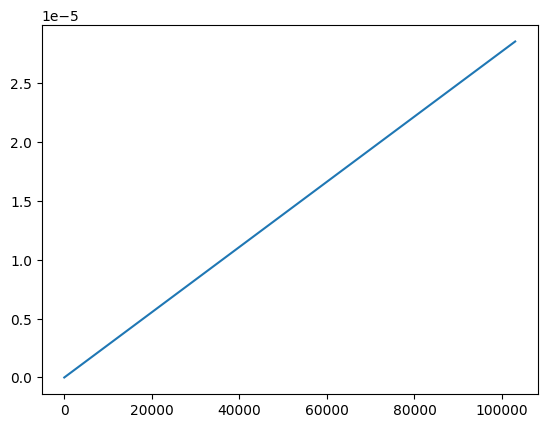

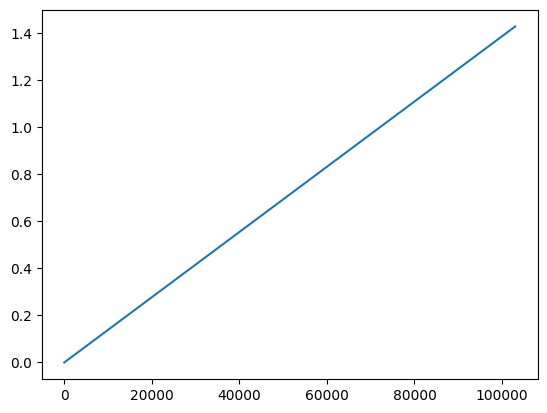

15 PSI


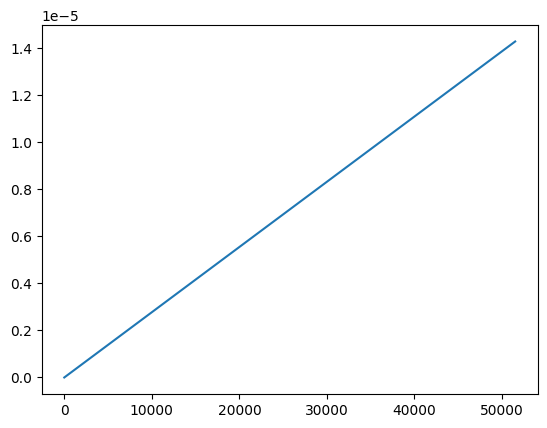

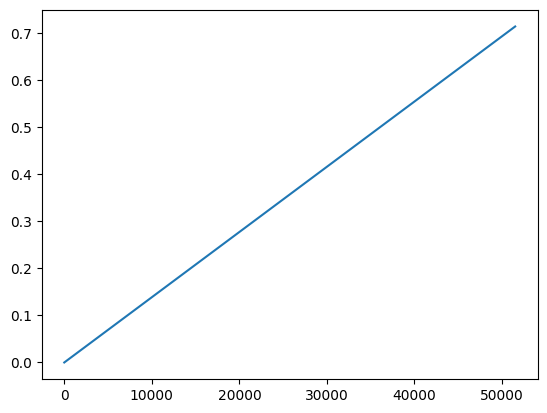

cap:2.9000710227272726e-18
Pr vol:2.9870731534090906e-13
vol lim:6.282000000000001e-13
adj cap:6.0990291262135935e-18
Calc vol:9.558634090909085e-09


In [32]:
# membrane calcs

r = 100e-6
E = 7.7e6
v = 0.3
th= 20e-6

#D = 3.141 * r**(6) * (1 - v**2)/(16*E*th**3)

#cap = D

#print(cap)

P = np.linspace(0, 103e3, 1000)

#V = P*D

#plt.plot(P, V)
#plt.show()

D = E*th**3/(12*(1-v**2))

R = r

w = lambda r, p: p*R**4/(64*D) * (1 - (r/R)**2)**2

wd = w(0, P)

# 30 PSI
print("D:"+str(D))
print(max(P))
plt.plot(P, wd)
plt.show()

wh = wd/th

plt.plot(P, wh)
plt.show()


# 15 PSI
print("15 PSI")
P = np.linspace(0, 103e3/2, 1000)
wd = w(0, P)
plt.plot(P, wd)
plt.show()

wh = wd/th

plt.plot(P, wh)
plt.show()

cap = 3.141*R**6 * (1-v**2)/(16*E*th**3)
print("cap:"+str(cap))
cap_vol = cap * 103e3
print("Pr vol:"+str(cap_vol))
vol_lim = 3.141*R**2 * 20e-6
print("vol lim:"+str(vol_lim))
adj_cap = vol_lim/103e3
print("adj cap:"+str(adj_cap))
#Modeling shows that ~6 PSI we make contact with the bottom surface

vol = lambda r, p: p*R**4/(64*D) * (r - 2/3*r**3/R**2 + 1/5*r**5/R**4) * 2*3.141

calc_vol = vol(R, 103e3)
print("Calc vol:"+str(calc_vol))


D:5.6410256410256435e-09
27578.8
Deflection


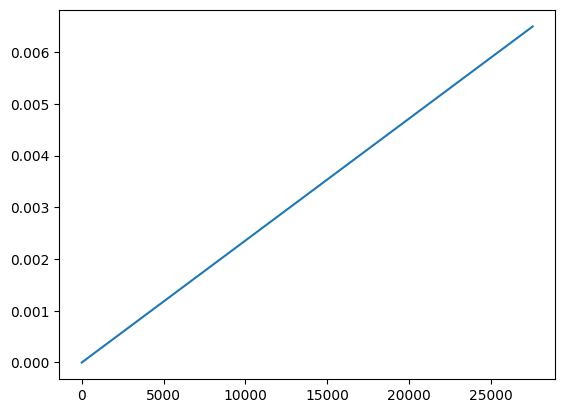

deflection ratio


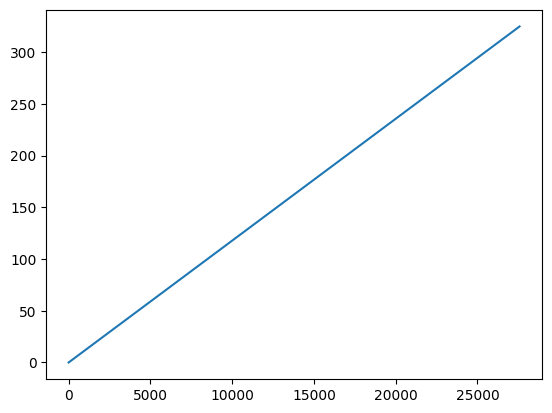

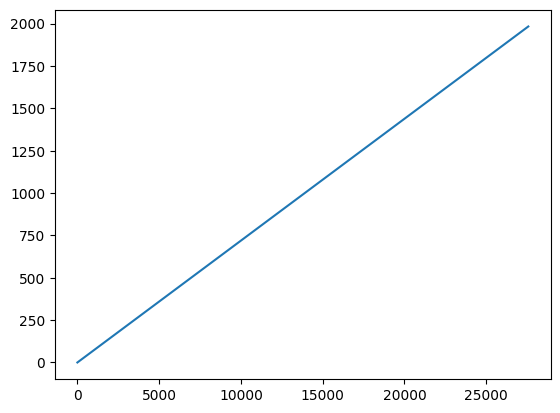

cap:7.190700376062271e-14
Pr vol:2.8762801504249084e-13
vol lim:5.4954935999999995e-11
adj cap:1.3738733999999999e-11
Pressure limit:254.75003882766939
Vol @ 254.75003882766939: 18.318312000000002


In [40]:
# membrane calcs

r = 540e-6
E = 7.7e6
v = 0.3
th= 20e-6

R = r
#D = 3.141 * r**(6) * (1 - v**2)/(16*E*th**3)

#cap = D

#print(cap)

P_max = 4 #psi

psi_to_pa = lambda p : p*6.8947e3

P = np.linspace(0, psi_to_pa(P_max), 1000)

#V = P*D

#plt.plot(P, V)
#plt.show()

D = E*th**3/(12*(1-v**2))

w = lambda r, p: p*R**4/(64*D) * (1 - (r/R)**2)**2
cap = 3.141*R**6 * (1-v**2)/(16*E*th**3)

wd = w(0, P)

# 30 PSI
print("D:"+str(D))
print(max(P))
print("Deflection")
plt.plot(P, wd)
plt.show()

wh = wd/th

print("deflection ratio")
plt.plot(P, wh)
plt.show()


v_c = cap * P * 1e12 # convert to nanoliters

plt.plot(P, v_c)
plt.show()


print("cap:"+str(cap))
cap_vol = cap * P_max
print("Pr vol:"+str(cap_vol))
vol_lim = 3.141*R**2 * 60e-6
print("vol lim:"+str(vol_lim))
adj_cap = vol_lim/P_max
print("adj cap:"+str(adj_cap))
#Modeling shows that ~6 PSI we make contact with the bottom surface

P_fr_w = lambda w : 64*D*w/R**4

P_lim = P_fr_w(60e-6)
print("Pressure limit:"+str(P_lim))
vol_f_lim = cap * P_lim * 1e12
print("Vol @ "+str(P_lim)+": "+str(vol_f_lim))


0.0


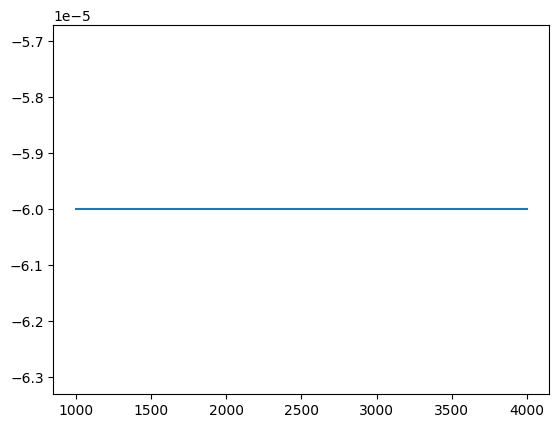

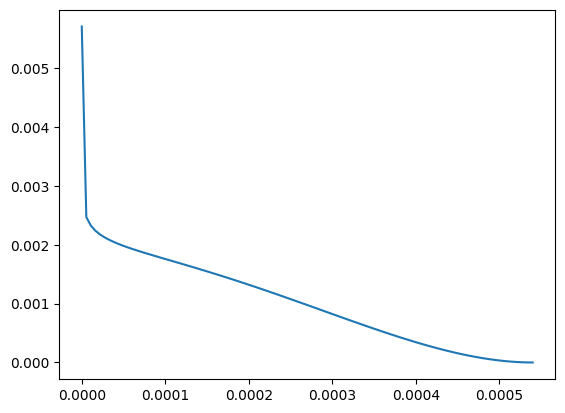

In [88]:
import math
ln = math.log

r = 540e-6
E = 7.7e6
v = 0.3
th= 20e-6

R = r
D = E*th**3/(12*(1-v**2))
w_lim = 60e-6

C_r = lambda p : p*R**4/(64*D)
w_r_lim1= lambda r, p : (ln(r) * (C_r(p)-w_lim)*(1+2*ln(R)) / (2*(ln(R))**2) - \
                         r**2 * 2*C_r(p)/R**2 + \
                         r**2*ln(r) * (w_lim-C_r(p))/(2*(R*ln(R))**2) + \
                         w_lim + r**4 * C_r(p)/R**4) 
w_r_lim0= lambda r, p : w_lim+C_r(p)*r**4

def w_r_lim(r, p):
    
    out_arr = []
    if (not isinstance(r,float)) or (not isinstance(r,int)):
        for v in r:
            out_arr.append(w_r_lim1(v,p))
    else:
        return w_r_lim1(r,p)
    return out_arr

w_atR = w_r_lim1(r, psi_to_pa(10))
print(w_atR)

w_wlim = w_r_lim0(0, Pr)

w_o_r = np.linspace(1e-12, R, 100)

P_1 = psi_to_pa(1)
w_wlim1 = w_r_lim(w_o_r, P_1) 

P_2 = psi_to_pa(10)
w_wlim2 = w_r_lim(w_o_r, P_1)

P_3 = psi_to_pa(100)
w_wlim3 = w_r_lim(w_o_r, P_1)

plt.plot(Pr, w_wlim)
plt.show()

plt.plot(w_o_r, w_wlim1)
#plt.plot(w_o_r, w_wlim2)
#plt.plot(w_o_r, w_wlim3)
plt.show()


In [11]:
r = 540e-6
E = 7.7e6
v = 0.3
th= 20e-6

R = r
D = E*th**3/(12*(1-v**2))
w_lim = 60e-6

sim_w_r_lim = lambda r,p : w_lim + p*R**2/(32*D) * r**2 * (2*r**2/R**2 - 1)

w_o_r = np.linspace(0, R, 100)

P_2 = psi_to_pa(10)
w_wlim2 = sim_w_r_lim(w_o_r, P_2)

plt.plot(w_o_r, w_wlim2)
plt.show()

rs = lambda r : (2*r**2/R**2 - 1)

rs1 = rs(w_o_r)
plt.plot(w_o_r, rs1)
plt.show()
print(R)
print(max(w_o_r))

NameError: name 'psi_to_pa' is not defined

[]

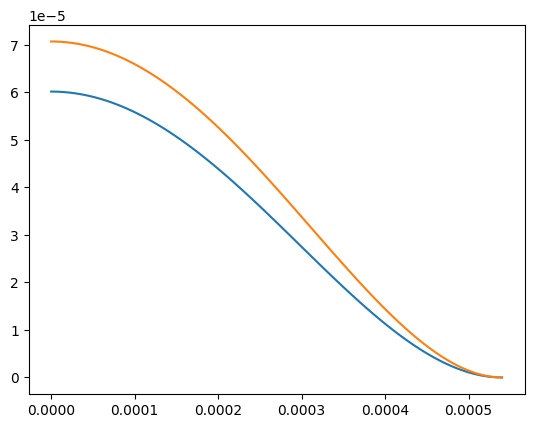

In [120]:
r = 540e-6
E = 7.7e6
v = 0.3
th= 20e-6

R = r
D = E*th**3/(12*(1-v**2))
w_lim = 60e-6

C2 = lambda p0,p1 :-(6*p0-5*p1)*R**2 / (192*D)
C4 = lambda p0,p1 :(9*p0-7*p1)*R**4 / (576*D)
p1_d = lambda p0, pd: -2*pd/(3.141*R**2) + 2*p0

w = lambda r, p: p*R**4/(64*D) * (1 - (r/R)**2)**2
w_p1 = lambda r,p0,p1 : C2(p0,p1)*r**2 + C4(p0,p1) + (p0-p1)*r**4/(64*D) + p1*r**6/(576*D*R**2)

pd = 254.75 # pressure for 60um deflection

p0_ap = psi_to_pa(2)
p1_ap = p1_d(p0_ap, pd)

w_o_r = np.linspace(0, R, 100)

w_1 = w_p1(w_o_r, p0_ap, p1_ap)*1e-6*0.59
w_defl = w(w_o_r, 300)

plt.plot(w_o_r, w_1)
plt.plot(w_o_r, w_defl)
plt.plot()


In [182]:
r_const = lambda p : p*R**4 / (64*D)

a = lambda p : 1/R**4 * r_const(p)
b = lambda p : -2/R**2 * r_const(p)
c = lambda w_v,p : (r_const(p) - w_v)

roots = lambda w_v,p : [-b(p)+(b(p)**2 - 4*a(p)*c(w_v,p))**(1/2) /(2*a(p)),
                        -b(p)-(b(p)**2 - 4*a(p)*c(w_v,p))**(1/2) /(2*a(p))]

roots_r=lambda w_v,p : [R**2 * (1+8/R**2*(D*w_v/p)**(1/2)),
                        R**2 * (1-8/R**2*(D*w_v/p)**(1/2))]

print("d:"+str(D))
print([a(300), b(300), c(60e-6, 300)])

w_v1 = 70e-6

p1 = 300
p2 = 1000
p3 = 2000

r1 = roots(w_v1, p1)[0]**(1/2)
print(r1)
r1r0= roots_r(w_v1, p1)[0]**(1/2)
r1r1= roots_r(w_v1, p1)[1]**(1/2)
print(r1r0)
print(r1r1)
print("\n")
w_validate = w(r1r1,p1)
print(w_validate)
print("\n")

r2 = roots(w_v1, p2)[0]**(1/2)
print(r2)
r3 = roots(w_v1, p3)[0]**(1/2)
print(r3)

root_base = [0,0]
root_base[0] = 64/R**4 * D*w_v1 / 300
root_base[1] = 16/R**2 * (D*w_v1 /300)**(1/2)

print(root_base)


d:5.6410256410256435e-09
[830965909.0909088, -484.6193181818181, 1.065749659090907e-05]
22.01407092002881
0.0007627844394182738
3.6876808177359674e-05


7.000000000000001e-05


40.19201074133636
56.84008668763501
[0.9906945954409362, 1.9906728464927999]


roots P


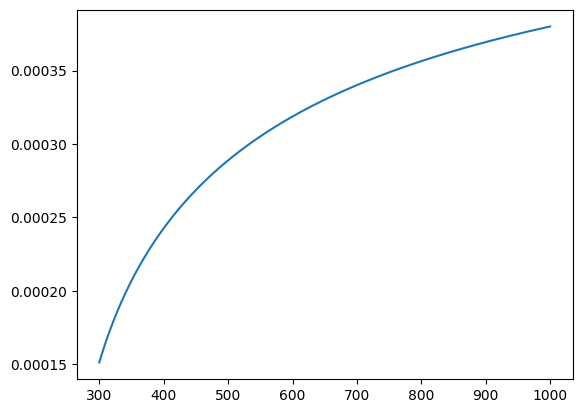

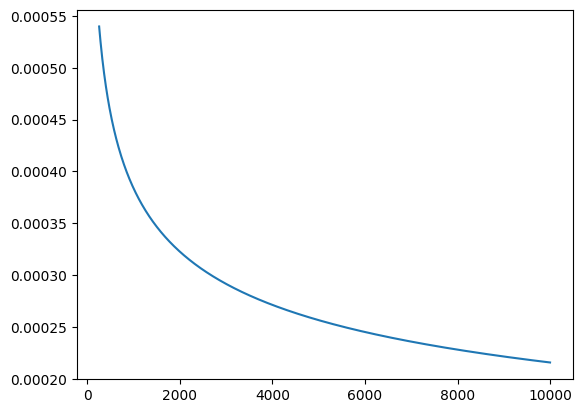

model volumes: [lin cap, rt cap] 300
[2.1572101128186813e-11, 2.1194196613273563e-11]
model volumes: [lin cap, rt cap] 1000
[7.190700376062271e-11, 3.64634174798368e-11]


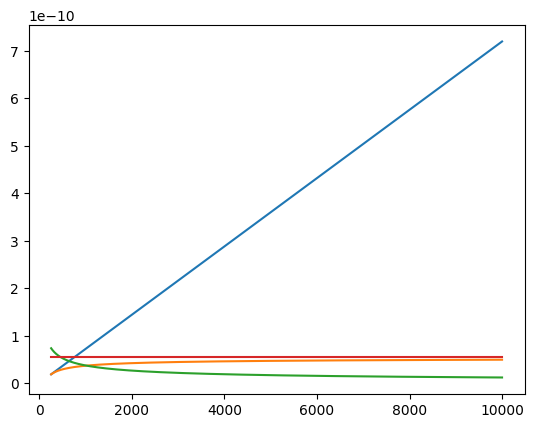

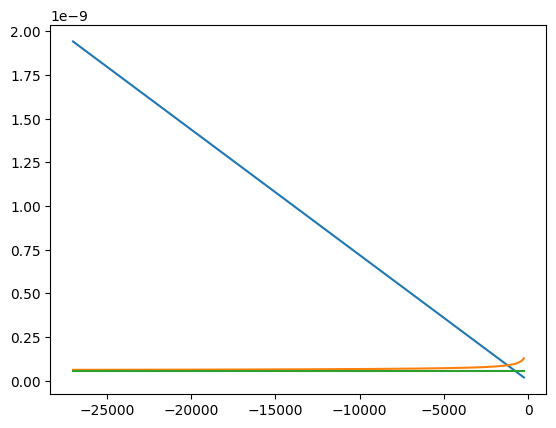

In [14]:
#roots_r=lambda w_v,p : [R**2 * (1+8/R**2*(D*w_v/abs(p))**(1/2)),
#                        R**2 * (1-8/R**2*(D*w_v/abs(p))**(1/2))]
r = 540e-6
E = 7.7e6
v = 0.3
th= 20e-6

R = r
D = E*th**3/(12*(1-v**2))
w_lim = 60e-6

psi_to_pa = lambda p : p*6.8947e3

roots_r=lambda w_v,p : [R**2 + 8*(D*w_v/abs(p))**(1/2),
                        R**2 - 8*(D*w_v/abs(p))**(1/2)]

vol_rt1   = lambda w, p : roots_r(w, p)[1]**(1/2)
vol_rt0   = lambda w, p : roots_r(w, p)[0]**(1/2)

p_lim_t = np.linspace(300, 1000, 1000)

print("roots P")
r_rt = vol_rt1(60e-6, p_lim_t)

plt.plot(p_lim_t, r_rt)
plt.show()

cap = 3.141*R**6 * (1-v**2)/(16*E*th**3)

vol_int  = lambda r   : 2*3.141*(0.5*r**2 - (1/(2*R**2) * r**4) + (1/(6*R**4) * r**6))
#vol_comp = lambda w,p : 3.141*p*R**6/(3*64*D) - (vol_int(vol_rt(w, p)))*p*R**4/(64*D) + 3.141*w*vol_rt(w,p)**2
vol_comp = lambda w,p : cap*p - (vol_int(vol_rt1(w, p)))*p*R**4/(64*D) + 3.141*w*vol_rt1(w,p)**2

vol_5_R    = lambda w_l, p : (w_l*64*D/p)**(1/4)
vol_comp_5 = lambda w_l, p : 3.141*(1 - v**2)/(16*E*th**3) * vol_5_R(w_l,p)**6 * p + \
    3.141*w_l*(vol_5_R(w_l,p))**2


w_lim = 60e-6
p_lim_t = np.linspace(255, 10e3, 1000)

vol_c = cap * p_lim_t   
vol_r = vol_comp(w_lim, p_lim_t)
vol_R5 = vol_comp_5(w_lim, p_lim_t)

# R calculation function
r5 = vol_5_R(w_lim, p_lim_t)
plt.plot(p_lim_t, r5)
plt.show()

vol_c_300 = 300*cap
vol_r_300 = vol_comp(w_lim, 300)

print("model volumes: [lin cap, rt cap] 300")
print([vol_c_300, vol_r_300])

vol_c_1000 = 1000*cap
vol_r_1000 = vol_comp(w_lim, 1000)
print("model volumes: [lin cap, rt cap] 1000")
print([vol_c_1000, vol_r_1000])

v_val_lim = np.ones(1000)*3.141*R**2*w_lim


plt.plot(p_lim_t, vol_c)
plt.plot(p_lim_t, vol_r)
plt.plot(p_lim_t, vol_R5)
plt.plot(p_lim_t, v_val_lim)
plt.show()

# calculation for negative values
vol_comp0 = lambda w,p : cap*p - (vol_int(vol_rt0(w, p)))*p*R**4/(64*D) + 3.141*w*vol_rt0(w,p)**2
p_lim_t = np.linspace(-255, -27e3, 1000)

vol_c = cap * abs(p_lim_t)   
vol_r = vol_comp0(w_lim, p_lim_t)

plt.plot(p_lim_t, vol_c)
plt.plot(p_lim_t, vol_r)
plt.plot(p_lim_t, v_val_lim)
plt.show()

4.654195791061918e-06
0.00054


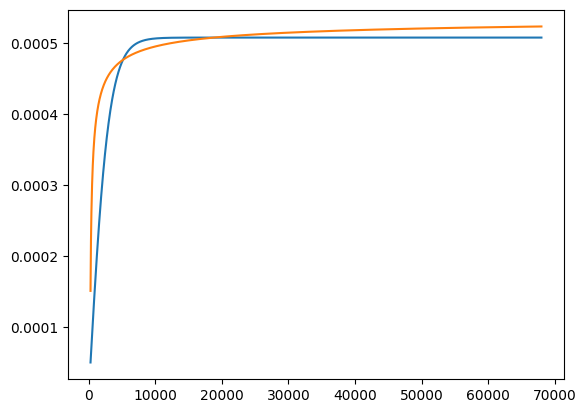

model volume : [rt , hyper] 1000
[3.64634174798368e-11, 3.934215661261169e-11, 2.3442179273720103e-11]
model volume : [rt , hyper] 6800
[4.786376235220616e-11, 5.1657511678062854e-11, 3.84562423603315e-11]
model volume : [rt , hyper] 27000
[5.1396241601552696e-11, 5.165763983999999e-11, 3.846845519999935e-11]
model volume : [rt , hyper] 300
[2.1194196613273563e-11, 1.504852201487378e-11, 8.5327848254222e-12]
model volume : [rt , hyper, hyper3, rt5] 68000
[5.271250999892064e-11, 5.165763983999999e-11, 3.846845519999999e-11, 3.2247982908632625e-11]


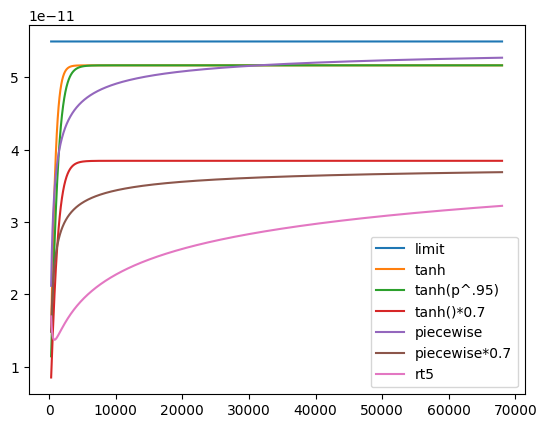

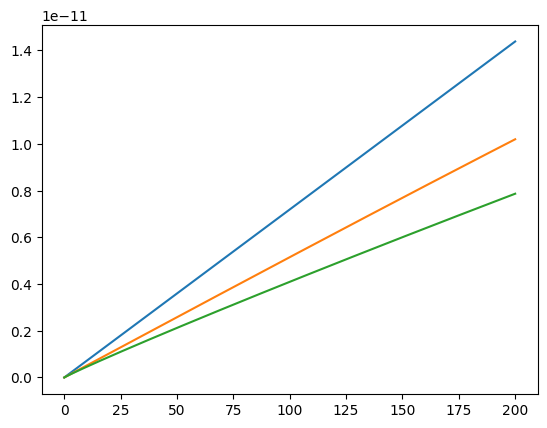

In [15]:
# varactor
import math
tanh = math.tanh

p0_rt = 3000

p0_v = 1000
w_h = 60e-6

p_lim_t = np.linspace(300, 68e3, 2000)

v_val_lim = np.ones(len(p_lim_t))*3.141*R**2*w_lim

vol_t_lim = 3.141*R**2*w_h

R_h = R*0.94
vol_rth  = lambda w,p : R_h*tanh(p/p0_rt)
vol_rth_a= lambda w,pr: [R_h*tanh(p/p0_rt) for p in pr]
# -----------------
vol_var = lambda w,p : 3.141*R**2*w*0.94*tanh(p/p0_v)
vol_var_a= lambda w,pr : [vol_var(w,p) for p in pr]
vol_var2_a= lambda w,pr : [3.141*R**2*w*0.94*tanh(p**(0.95)/p0_v) for p in pr]
vol_var3  = lambda w,p  : 3.141*R**2*w*0.70*tanh(p**(0.95)/p0_v) 
vol_var3_a= lambda w,pr : [3.141*R**2*w*0.70*tanh(p**(0.95)/p0_v) for p in pr]


# redefined for P+
vol_comp = lambda w,p : cap*p - (vol_int(vol_rt1(w, p)))*p*R**4/(64*D) + 3.141*w*vol_rt1(w,p)**2

r_rth= vol_rth_a(w_h, p_lim_t)
r_rt = vol_rt1(w_h, p_lim_t)

vol_5_R    = lambda w_l, p : (w_l*64*D/p)**(1/4)
vol_comp_5 = lambda w_l, p : 3.141*(1 - v**2)/(16*E*th**3) * vol_5_R(w_l,p)**6 * p + \
    3.141*w_l*(R-vol_5_R(w_l,p))**2

p_mul = 8*(D*w_h)**(1/2)
print(p_mul)

#r_asy = R**2/(8*(D*w_h)**(1/2))
r_asy = R
print(r_asy)
plt.plot(p_lim_t, r_rth)
plt.plot(p_lim_t, r_rt)
plt.show()

vol_r = vol_comp(w_h, p_lim_t)
vol_va= vol_var_a(w_h, p_lim_t)
vol_va2= vol_var2_a(w_h, p_lim_t)
vol_va3= vol_var3_a(w_h, p_lim_t)
vol_R5= vol_comp_5(w_h, p_lim_t)


v_r_1000 = vol_comp(w_h, 1000)
v_h_1000 = vol_var(w_h, 1000)
v_h3_1000 = vol_var3(w_h, 1000)

print("model volume : [rt , hyper] 1000")
print([v_r_1000, v_h_1000, v_h3_1000])

v_r_6800 = vol_comp(w_h, 6800)
v_h_6800 = vol_var(w_h, 6800)
v_h3_6800 = vol_var3(w_h, 6800)

print("model volume : [rt , hyper] 6800")
print([v_r_6800, v_h_6800, v_h3_6800])

v_r_27000 = vol_comp(w_h, 27000)
v_h_27000 = vol_var(w_h, 27000)
v_h3_27000 = vol_var3(w_h, 27000)

print("model volume : [rt , hyper] 27000")
print([v_r_27000, v_h_27000, v_h3_27000])

v_r_27000 = vol_comp(w_h, 300)
v_h_27000 = vol_var(w_h, 300)
v_h3_27000 = vol_var3(w_h, 300)

print("model volume : [rt , hyper] 300")
print([v_r_27000, v_h_27000, v_h3_27000])

v_r_27000 = vol_comp(w_h, 68000)
v_h_27000 = vol_var(w_h, 68000)
v_h3_27000 = vol_var3(w_h, 68000)
v_r5_68000 = vol_comp_5(w_h, 68000)

print("model volume : [rt , hyper, hyper3, rt5] 68000")
print([v_r_27000, v_h_27000, v_h3_27000, v_r5_68000])

plt.plot(p_lim_t, v_val_lim, label='limit')
plt.plot(p_lim_t, vol_va, label='tanh')
plt.plot(p_lim_t, vol_va2,label='tanh(p^.95)')
plt.plot(p_lim_t, vol_va3,label='tanh()*0.7')
plt.plot(p_lim_t, vol_r, label='piecewise')
plt.plot(p_lim_t, vol_r*0.7, label='piecewise*0.7')
plt.plot(p_lim_t, vol_R5, label='rt5')
plt.legend()
plt.show()

# linear region
p_lim_t_lin = np.linspace(0, 200, 1000)

v_h_lin = vol_var_a(w_h, p_lim_t_lin)
v_h_lin2 = vol_var2_a(w_h, p_lim_t_lin)
v_c_lin = p_lim_t_lin * cap

plt.plot(p_lim_t_lin, v_c_lin)
plt.plot(p_lim_t_lin, v_h_lin)
plt.plot(p_lim_t_lin, v_h_lin2)
plt.show()



In [116]:
v_r5_min = min(vol_R5)
print(v_r5_min)

v5_m_ind = np.where(vol_R5 == v_r5_min)[0][0]
print(v5_m_ind)

p5_m_val = p_lim_t[v5_m_ind]
print(p5_m_val)

1.3738766543205045e-11
15
808.0040020010005


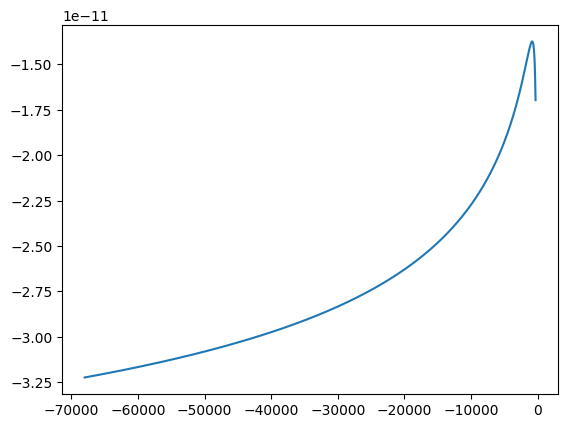

In [77]:


vol_5_R    = lambda w_l, p : (w_l*64*D/abs(p))**(1/4)
vol_comp_5 = lambda w_l, p : 3.141*(1 - v**2)/(16*E*th**3) * vol_5_R(w_l,p)**6 *abs(p) + \
    3.141*w_l*(R-vol_5_R(w_l,p))**2

p_lim_tn = np.linspace(-300, -68e3, 2000)

vol_R5n= -vol_comp_5(w_h, p_lim_tn)

plt.plot(p_lim_tn, vol_R5n)
plt.show()

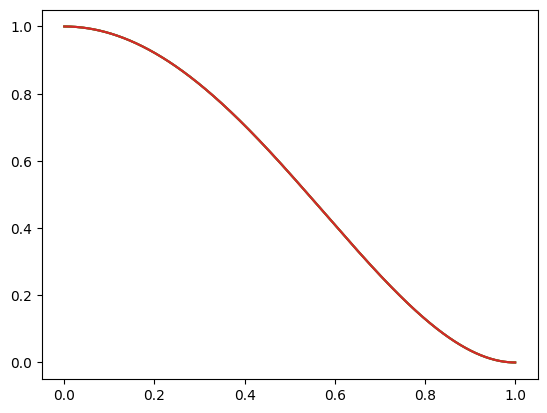

In [169]:


wR = lambda r, R, p: p*R**4/(64*D) * (1 - (r/R)**2)**2

r_540 = np.linspace(0, 540e-6, 1000) 
w_540 = wR(r_540, 540e-6, 27e3)
r_500 = np.linspace(0, 500e-6, 1000)
w_500 = wR(r_500, 500e-6, 27e3)
r_400 = np.linspace(0, 400e-6, 1000)
w_400 = wR(r_400, 400e-6, 27e3)
r_300 = np.linspace(0, 300e-6, 1000)
w_300 = wR(r_300, 300e-6, 27e3)

r_540n = r_540/max(r_540)
r_500n = r_500/max(r_500)
r_400n = r_400/max(r_400)
r_300n = r_300/max(r_300)

w_540n = w_540/max(w_540)
w_500n = w_500/max(w_500)
w_400n = w_400/max(w_400)
w_300n = w_300/max(w_300)


plt.plot(r_300n, w_300n)
plt.plot(r_540n, w_540n)
plt.plot(r_500n, w_500n)
plt.plot(r_400n, w_400n)
plt.show()


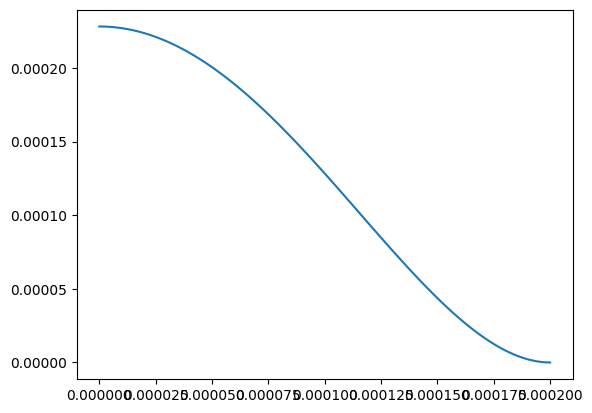

[1.5293814545454537e-07, 7.352795454545452e-12]


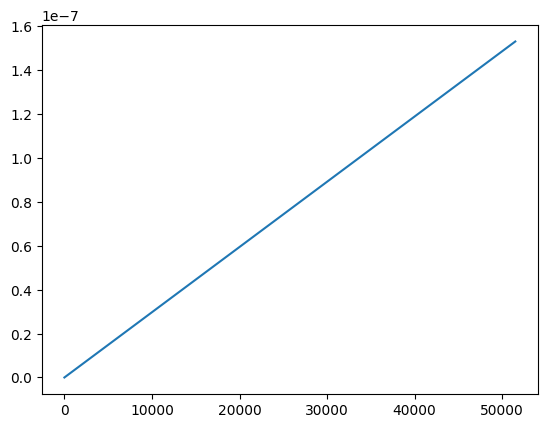

In [28]:
w = lambda r, p: p*R**4/(64*D) * (1 - (r/R)**2)**2

rad = np.linspace(0, r, 100)
Pr  = 103e3/2

w_defl = w(rad, Pr)

plt.plot(rad, w_defl)
plt.show()

# not correct
vol = lambda r, p: p*R**4/(64*D) * (r - 2/3*r**3/R**2 + 1/5*r**5/R**4) * 2*3.141

pl_v = vol(r, P)

plt.plot(P, pl_v)

print([vol(r, Pr), Pr*cap])

In [82]:
Pr  = 103e3
r1 = (-r**2 + r**2*(1+20e-6-Pr*r**4/(64*D))**(1/2) )**(1/2)
r2 = (-r**2 - r**2*(1+20e-6-Pr*r**4/(64*D))**(1/2) )**(1/2)
r3 = -(-r**2 + r**2*(1+20e-6-Pr*r**4/(64*D))**(1/2))**(1/2)
r4 = -(-r**2 - r**2*(1+20e-6-Pr*r**4/(64*D))**(1/2))**(1/2)

Pr = 103e3
r11= (-r**2 + 4*(20*D/Pr)**(1/2) )**(1/2)

print([r1, r2, r3, r4])
print(r11)

[(1.8092574526420542e-22+2.9547416510649923e-06j), (1.7318176070448992e-20+0.00028282727856728294j), (-1.8092574526420542e-22-2.9547416510649923e-06j), (-1.7318176070448992e-20-0.00028282727856728294j)]
0.0020362585379484943


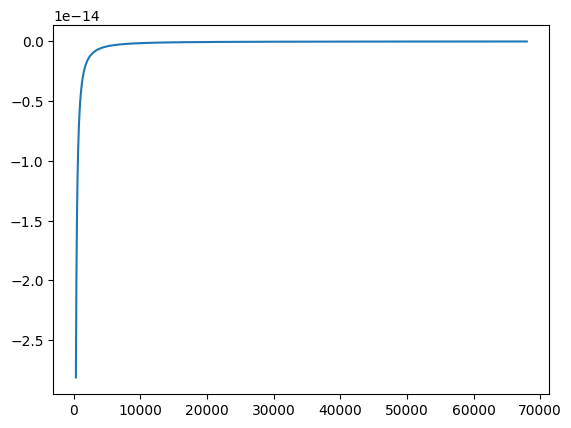

805.1359251837454


In [9]:
import numpy as np
import matplotlib.pyplot as plt

pi = 3.141

r = 540e-6
E = 7.7e6
v = 0.3
th= 20e-6

R = r
D = E*th**3/(12*(1-v**2))
w_lim = 60e-6

w_l = w_lim

p_lim_t = np.linspace(300, 68e3, 10000)

C_1_dp = pi*w_l*R/2 * (w_l*64*D)**(1/4)
C_2_dp = -pi*(1-v**2)/(E*th**3) * 16*(w_l*D)**(3/2) - pi*w_l/2 * (w_l*64*D)**(1/2)

#v_comp_5_dp = lambda p : -pi*(1-v**2)/(E*th**3)*16*w_l**(3/2)*D**(3/2)*(1/p**(3/2)) + pi*512*R*w_l**(5/2)*D**(3/2)*(1/p**(3/2)) - pi*192*w_l**4*D**3*(1/p**4)
                        
vdp_5 = v_comp_5_dp(p_lim_t)

plt.plot(p_lim_t, vdp_5)
plt.show()

dp_0 = (C_2_dp/C_1_dp)**4
print(dp_0)


In [17]:

dp2_0 = (C_2_dp*(-3/2)/(C_1_dp * (-5/4)))**4

print(dp2_0)

vd_dp_5 = lambda p : C_2_dp/p**(3/2) + C_1_dp/p**(5/4)

inf_pt_dp = vd_dp_5(dp2_0)

print(inf_pt_dp)

# linear model
C = vol_comp_5(w_l, dp2_0)/dp2_0

print(C)


1669.5298544610143
1.7143965664058364e-15
8.914862145310353e-15


In [ ]:
# nonlinear membrane models



In [60]:
a = 2**8
b = 4**(1/2)
print(a)
print(b)

256
2.0


Xyce -plugin ./../../Components/verilogA_build/lib/MFXyce.so /home/u1146591/MFDA/h.r.3.3_pdk/xyce_testing/JupyterTesting/../MFlibrary_testing/stdcellTesting/membrane_cap/mem_cap_test_v_0_1.cir > /home/u1146591/MFDA/h.r.3.3_pdk/xyce_testing/JupyterTesting/../MFlibrary_testing/stdcellTesting/membrane_cap/mem_cap_test_v_0_1.cir.log
Xyce -plugin ./../../Components/verilogA_build/lib/MFXyce.so /home/u1146591/MFDA/h.r.3.3_pdk/xyce_testing/JupyterTesting/../MFlibrary_testing/stdcellTesting/membrane_cap/mem_cap_test_v_0_1.cir > /home/u1146591/MFDA/h.r.3.3_pdk/xyce_testing/JupyterTesting/../MFlibrary_testing/stdcellTesting/membrane_cap/mem_cap_test_v_0_1.cir.log
plot: mem_cap_test_v_0_1.cir.prn


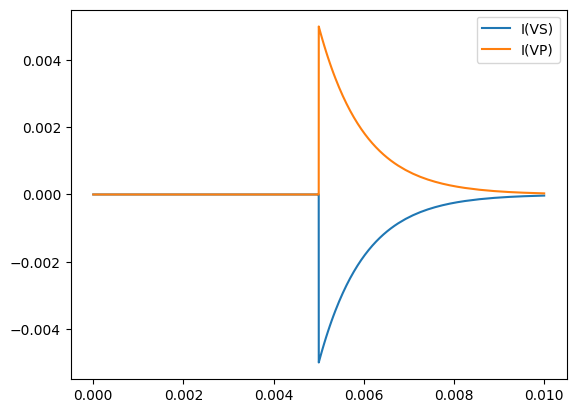

plot: mem_cap_test_v_0_1.cir.prn


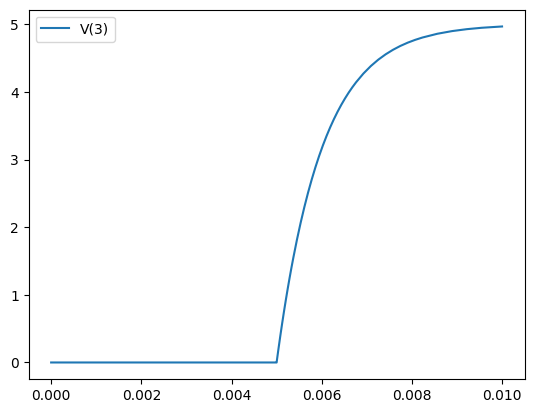

0
6.282e-08


In [155]:
#prn_f = mem_t_dir+'/results/mem_cap_test_v_0_1.cir.prn'
#plot_r(prn_f)
#
#res = plot_result.load_prn(prn_f)
#
#print(res.columns)
#
#tim  = res['TIME'] 
#I_vp = res['I(VP)']

cir = 'mem_cap_test_v_0_1.cir'
prn_f = mem_t_dir+'/results/'+cir+'.prn'
run_and_plot(lib, cir, plot_type="flow")
plot_r(prn_f, plot_type='voltage')
#def sum_cur(time, i, set_time_inter=None):
#    i_sum = 0
#    t_sl = [0,0]
#    if set_time_inter is not None:
#        if isinstance(set_time_inter, list) and len(set_time_inter) == 2:
#            for ind, ti in enumerate(set_time_inter):
#                for t_ind, t in enumerate(time):
#                    if t >= ti:
#                        t_sl[ind] = t_ind
#                        break
#            time = time.iloc[t_sl[0]:t_sl[1]].reset_index(drop=True)
#    
#    for ind, t in enumerate(time):
#        if ind == 0:
#            continue
#        else:
#            i_sum += (i[ind] - i[ind-1])*(time[ind-1] - time[ind])
#    return i_sum

I_vp_t = sum_cur(tim, I_vp, [0.004, 0.008])

print(I_vp_t)

est_vol = 200e-6 * 3.141 * 2 * 50e-6
print(est_vol)

plot: mem_cap_test_v_0_1_0_1.cir.prn


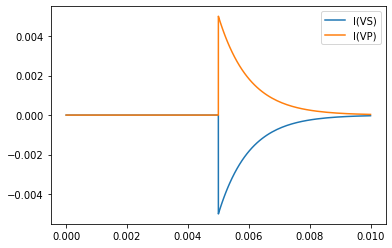

In [3]:
plot_r(mem_t_dir+'/results/mem_cap_test_v_0_1_0_1.cir.prn')

plot: mem_cap_test_v_0_1_4.cir.prn


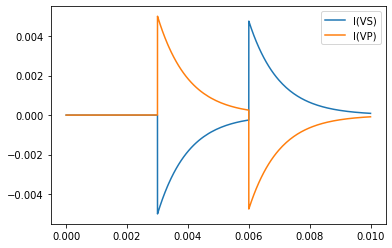

plot: mem_cap_test_v_0_1_4_V.cir.prn


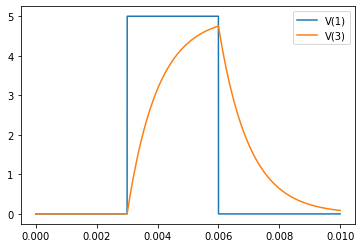

In [4]:
plot_r(mem_t_dir+'/results/mem_cap_test_v_0_1_4.cir.prn', 'flow')
plot_r(mem_t_dir+'/results/mem_cap_test_v_0_1_4_V.cir.prn')

Xyce -plugin ./../../Components/verilogA_build/lib/MFXyce.so /home/u1146591/MFDA/h.r.3.3_pdk/xyce_testing/JupyterTesting/../MFlibrary_testing/stdcellTesting/membrane_cap/mem_cap_test_v_0_2_0.cir > /home/u1146591/MFDA/h.r.3.3_pdk/xyce_testing/JupyterTesting/../MFlibrary_testing/stdcellTesting/membrane_cap/mem_cap_test_v_0_2_0.cir.log
Xyce -plugin ./../../Components/verilogA_build/lib/MFXyce.so /home/u1146591/MFDA/h.r.3.3_pdk/xyce_testing/JupyterTesting/../MFlibrary_testing/stdcellTesting/membrane_cap/mem_cap_test_v_0_2_0.cir > /home/u1146591/MFDA/h.r.3.3_pdk/xyce_testing/JupyterTesting/../MFlibrary_testing/stdcellTesting/membrane_cap/mem_cap_test_v_0_2_0.cir.log
plot: mem_cap_test_v_0_2_0.cir.prn


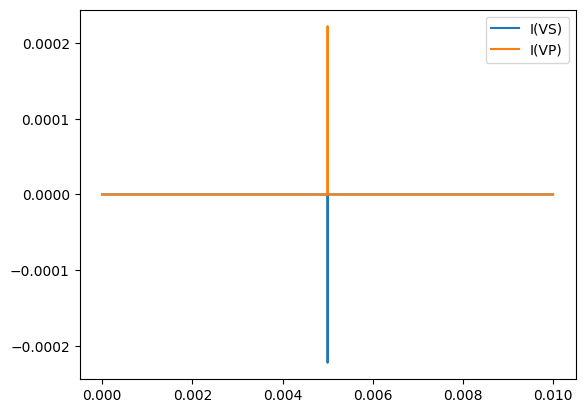

plot: mem_cap_test_v_0_2_0.cir.prn


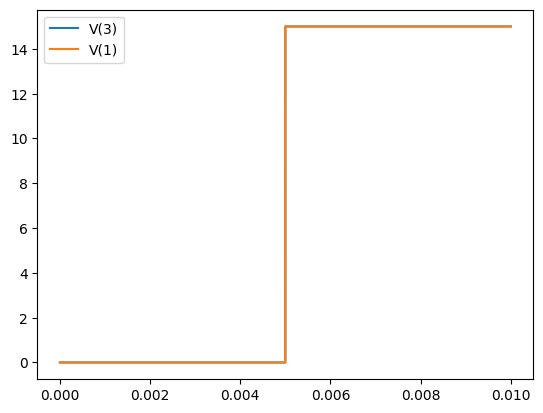

In [191]:
#plot_r(mem_t_dir+'/results/mem_cap_test_v_0_2.cir.prn')
#plot_r(mem_t_dir+'/results/mem_cap_test_v_0_2.cir.prn')
cir = 'mem_cap_test_v_0_2_0.cir'
prn_f = mem_t_dir+'/results/'+cir+'.prn'
run_and_plot(lib, cir, plot_type="flow")
plot_r(prn_f, plot_type='voltage')

Xyce -plugin ./../../Components/verilogA_build/lib/MFXyce.so /home/u1146591/MFDA/h.r.3.3_pdk/xyce_testing/JupyterTesting/../MFlibrary_testing/stdcellTesting/membrane_cap/mem_cap_test_v_0_2_1.cir > /home/u1146591/MFDA/h.r.3.3_pdk/xyce_testing/JupyterTesting/../MFlibrary_testing/stdcellTesting/membrane_cap/mem_cap_test_v_0_2_1.cir.log
Xyce -plugin ./../../Components/verilogA_build/lib/MFXyce.so /home/u1146591/MFDA/h.r.3.3_pdk/xyce_testing/JupyterTesting/../MFlibrary_testing/stdcellTesting/membrane_cap/mem_cap_test_v_0_2_1.cir > /home/u1146591/MFDA/h.r.3.3_pdk/xyce_testing/JupyterTesting/../MFlibrary_testing/stdcellTesting/membrane_cap/mem_cap_test_v_0_2_1.cir.log
plot: mem_cap_test_v_0_2_1.cir.prn


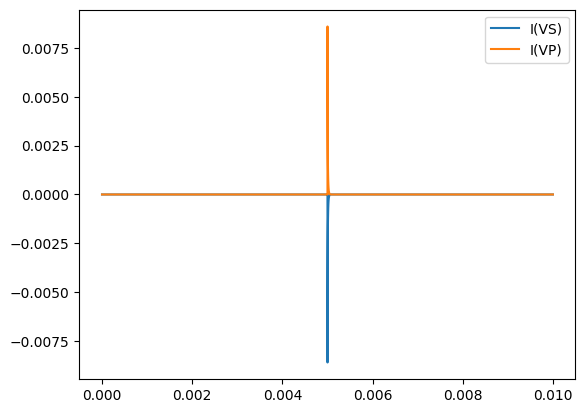

plot: mem_cap_test_v_0_2_1.cir.prn


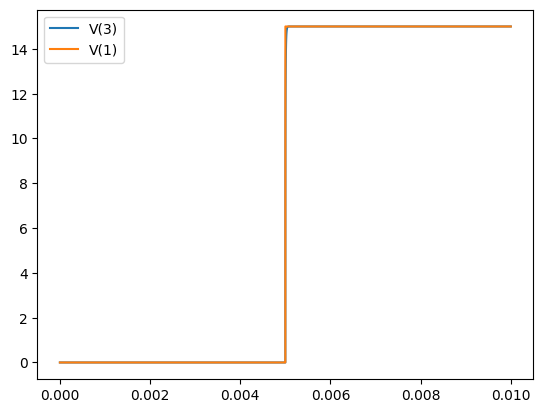

In [194]:
cir = 'mem_cap_test_v_0_2_1.cir'
prn_f = mem_t_dir+'/results/'+cir+'.prn'
run_and_plot(lib, cir, plot_type="flow")
plot_r(prn_f, plot_type='voltage')

plot: mem_cap_test_v_0_3.cir.prn


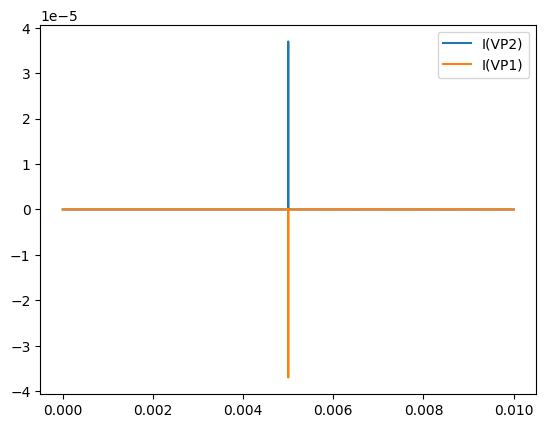

Index(['TIME', 'I(VP2)', 'I(VP1)'], dtype='object')
4.219168907139801e-14


In [11]:
# test 0.3

prn_f = mem_t_dir+'/results/mem_cap_test_v_0_3.cir.prn'
plot_r(prn_f)

res = plot_result.load_prn(prn_f)

print(res.columns)

tim  = res['TIME'] 
I_vp = res['I(VP2)']

I_vp_t = sum_cur(tim, I_vp)

print(I_vp_t)

plot: mem_cap_test_v_0_4.cir.prn


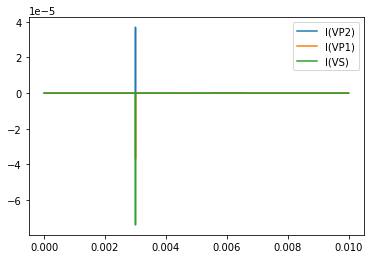

In [7]:
# test 0.4

plot_r(mem_t_dir+'/results/mem_cap_test_v_0_4.cir.prn')

/tmp/ipykernel_2538779/4195398092.py:10: RuntimeWarning: invalid value encountered in power
  cap   = m_fit*N_fit*P**(m_fit-1)


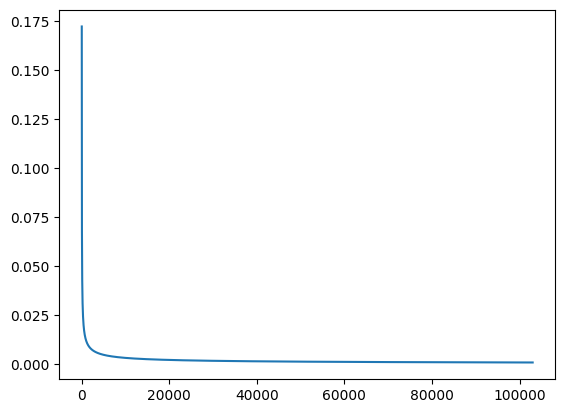

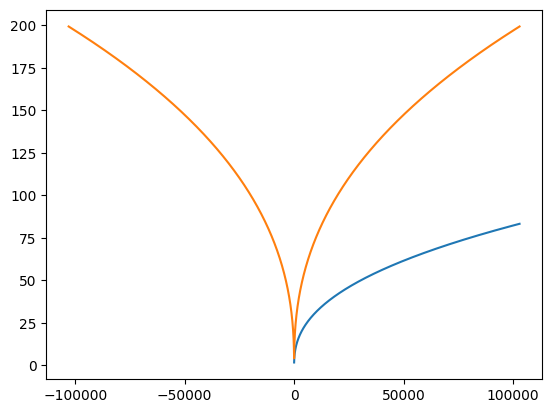

In [28]:
import numpy as np
import matplotlib.pyplot as plt


N_fit = 1.6020
m_fit = 0.41795

P = np.linspace(-103e3, 103e3, 10000)

cap   = m_fit*N_fit*P**(m_fit-1)
vol_m = N_fit*abs(P)**(m_fit)

plt.plot(P, cap)
plt.show()

Q = P*cap

plt.plot(P, Q)
plt.plot(P, vol_m)
plt.show()

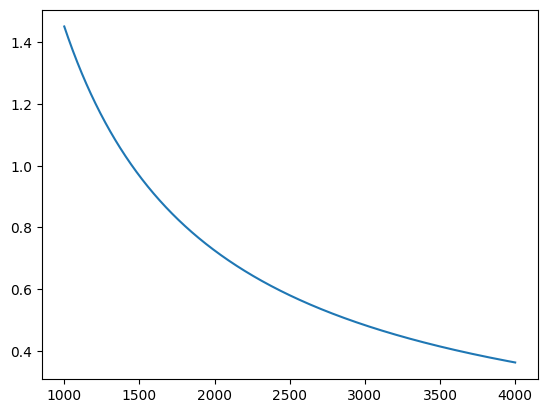

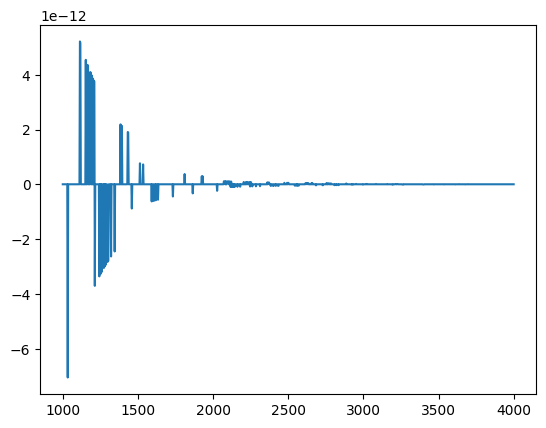

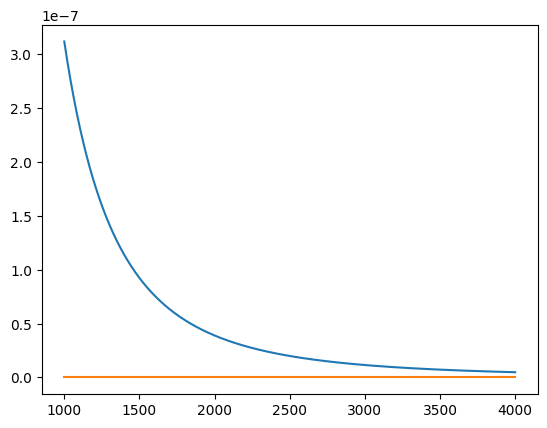

Volumes


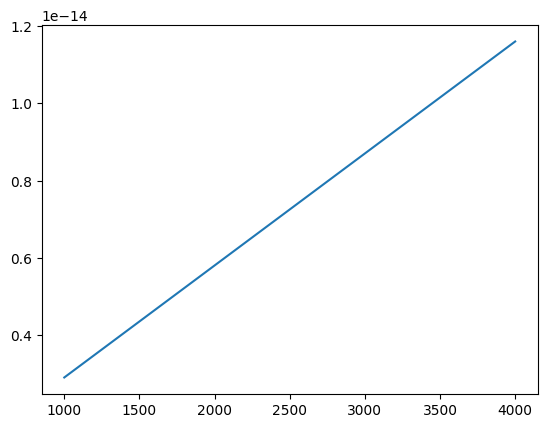

14.511420000000001
0.0003116417551192877
72557100.0


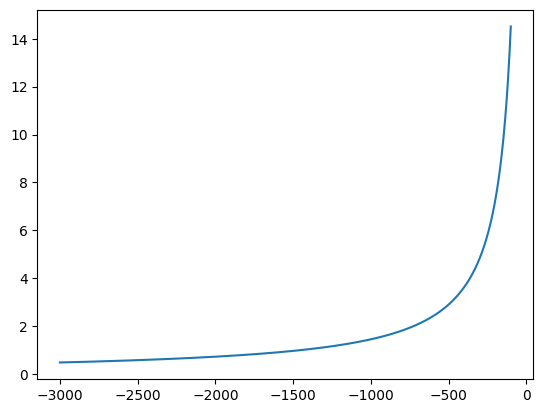

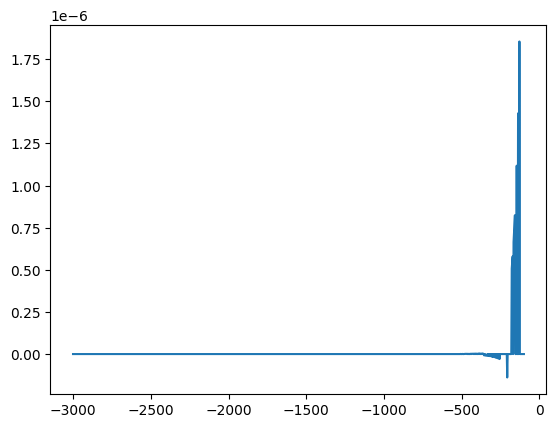

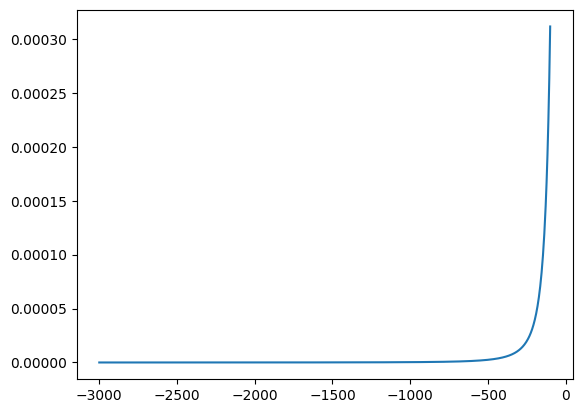

In [17]:
r = 100e-6
E = 7.7e6
v = 0.3
th= 20e-6

r_rad    = lambda pr : (3*3.141*E*th)/pr 
cap_nlin = lambda r  : (3.141*r**3)/(E*4) * ((8*r**2 - th**2 - 4*r*(4*r**2 - th**2)**(1/2))/(2*r - (4*r**2 - th**2)**(1/2)))
cap_nlins= lambda r  : (3.141*r**3)/(E*4) * (-th**2-th)/-th

cap = 3.141*r**6 * (1-v**2)/(16*E*th**3)

r_w_sin = lambda pr : pr*th/(4*E*th)

Pr = np.linspace(1000, 4e3, 1000)
r_out = r_rad(Pr)

plt.plot(Pr, r_out)
plt.show()

cap_out = cap_nlin(r_out)
cap_lin = cap * np.ones((1000))
plt.plot(Pr, cap_out)
plt.show()

cap_out = cap_nlins(r_out)
plt.plot(Pr, cap_out)
plt.plot(Pr, cap_lin)
plt.show()

vol_outs = np.multiply(cap_out, Pr)
vol_lin  = np.multiply(cap_lin, Pr)

print("Volumes")
#plt.plot(Pr, vol_outs)
plt.plot(Pr, vol_lin)
plt.show()

rP_is_1 = r_rad(100)
print(rP_is_1)
capP_is_1 = cap_nlins(rP_is_1)
print(capP_is_1)

P_when_r_isw = 3*3.141*E
print(P_when_r_isw)

Pr = np.linspace(-100, -3e3, 1000)
r_out = abs(r_rad(Pr))

plt.plot(Pr, r_out)
plt.show()

cap_out = cap_nlin(r_out)
plt.plot(Pr, cap_out)
plt.show()


cap_out = cap_nlins(r_out)
plt.plot(Pr, cap_out)
plt.show()



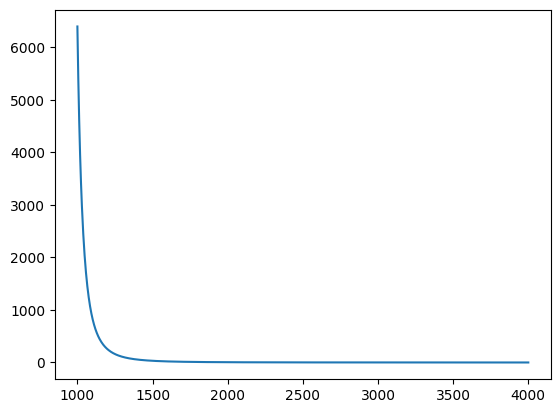

In [25]:

vol_rad  = lambda r : 3.141/24*(16*r**3 - (8*r**2 + th**2)*(4*r**2 - th**2)**(1/2))
vol_rads = lambda r : 3.141/24*(16*r**3 - ((th**2)*(th**2)**(1/2)))

Pr = np.linspace(1000, 4e3, 1000)
vol_out = vol_rads(r_out)

plt.plot(Pr, vol_out)
plt.show()


In [116]:
# resistance calculations
nu = 0.0010518
L  = 100e-6
ch_r= 100e-6

# 8*n*L/(pi * R^4)
resist = 8*nu*L/(3.141 * ch_r**4)
print(resist)


2678892072.5883474


Xyce -plugin ./../../Components/verilogA_build/lib/MFXyce.so /home/u1146591/MFDA/h.r.3.3_pdk/xyce_testing/JupyterTesting/../MFlibrary_testing/stdcellTesting/membrane_cap/mem_cap_test_v_0_4_0.cir > /home/u1146591/MFDA/h.r.3.3_pdk/xyce_testing/JupyterTesting/../MFlibrary_testing/stdcellTesting/membrane_cap/mem_cap_test_v_0_4_0.cir.log
Xyce -plugin ./../../Components/verilogA_build/lib/MFXyce.so /home/u1146591/MFDA/h.r.3.3_pdk/xyce_testing/JupyterTesting/../MFlibrary_testing/stdcellTesting/membrane_cap/mem_cap_test_v_0_4_0.cir > /home/u1146591/MFDA/h.r.3.3_pdk/xyce_testing/JupyterTesting/../MFlibrary_testing/stdcellTesting/membrane_cap/mem_cap_test_v_0_4_0.cir.log
plot: mem_cap_test_v_0_4_0.cir.prn


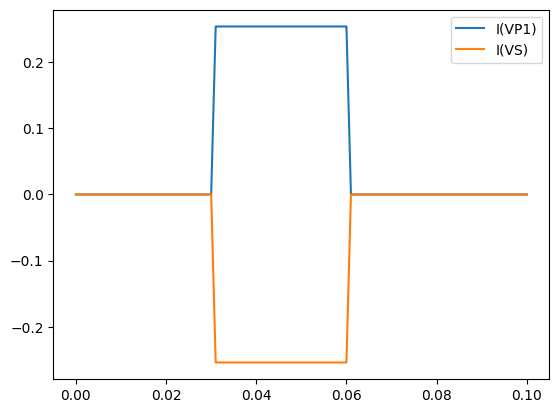

plot: mem_cap_test_v_0_4_0.cir.prn


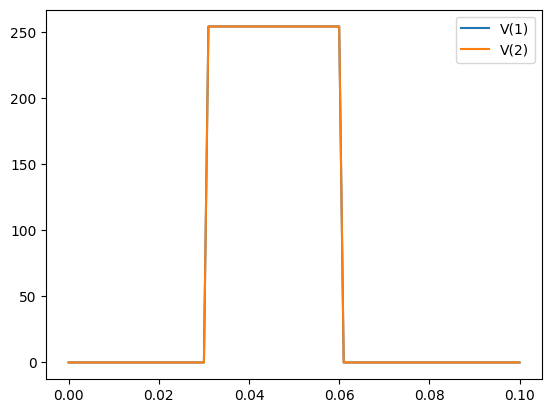

start:0 end:0
Series([], Name: I(VP1), dtype: float64)
Displ vol:0.015239999998759328
vol limit:5.4954935999999995e-11


In [82]:
cir = 'mem_cap_test_v_0_4_0.cir'
prn_f = mem_t_dir+'/results/'+cir+'.prn'
run_and_plot(lib, cir, plot_type="flow")
plot_r(prn_f, plot_type='voltage')

res = plot_result.load_prn(prn_f)
tim  = res['TIME'] 
I_vp = res['I(VP1)']

I_vp_t = sum_cur(tim, I_vp)*2

print("Displ vol:"+str(I_vp_t))

vol_lim = 3.141*540e-6**2*60e-6
print("vol limit:"+str(vol_lim))

Xyce -plugin ./../../Components/verilogA_build/lib/MFXyce.so /home/u1146591/MFDA/h.r.3.3_pdk/xyce_testing/JupyterTesting/../MFlibrary_testing/stdcellTesting/membrane_cap/mem_cap_test_v_0_4_1.cir > /home/u1146591/MFDA/h.r.3.3_pdk/xyce_testing/JupyterTesting/../MFlibrary_testing/stdcellTesting/membrane_cap/mem_cap_test_v_0_4_1.cir.log
Xyce -plugin ./../../Components/verilogA_build/lib/MFXyce.so /home/u1146591/MFDA/h.r.3.3_pdk/xyce_testing/JupyterTesting/../MFlibrary_testing/stdcellTesting/membrane_cap/mem_cap_test_v_0_4_1.cir > /home/u1146591/MFDA/h.r.3.3_pdk/xyce_testing/JupyterTesting/../MFlibrary_testing/stdcellTesting/membrane_cap/mem_cap_test_v_0_4_1.cir.log
plot: mem_cap_test_v_0_4_1.cir.prn


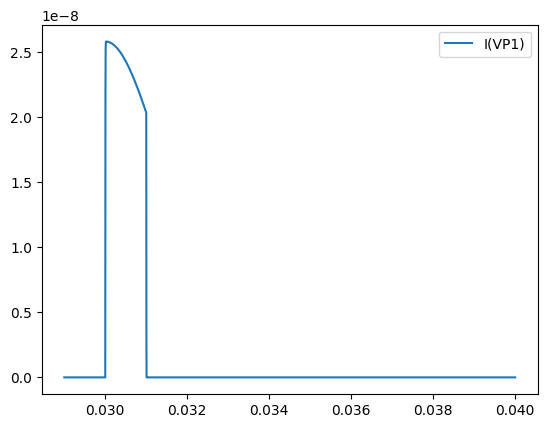

plot: mem_cap_test_v_0_4_1.cir.prn


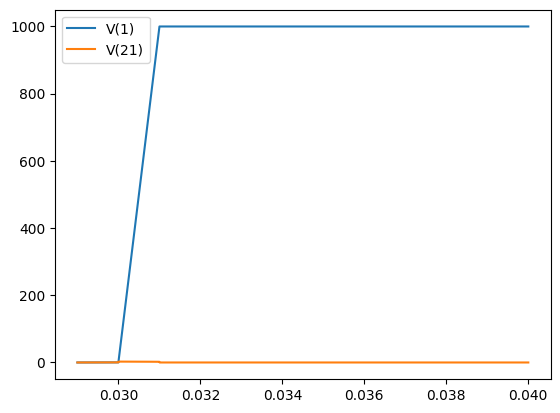

132
290
start:132 end:290
Index
132    0.000000e+00
133    9.761934e-12
134    1.779456e-11
135    3.385483e-11
136    6.594538e-11
           ...     
285    3.111610e-09
286    2.427331e-11
287   -7.923132e-12
288    2.586218e-12
289   -1.091915e-12
Name: I(VP1), Length: 158, dtype: float64
Displ vol:3.995620606697471e-13
vol limit:5.4954935999999995e-11
2.8803979719911943e-11


In [73]:
# nlin 3 - using a hyperbolic function 
cir = 'mem_cap_test_v_0_4_1.cir'
prn_f = mem_t_dir+'/results/'+cir+'.prn'
run_and_plot(lib, cir, plot_type="flow")
plot_r(prn_f, plot_type='voltage')

res = plot_result.load_prn(prn_f)
tim  = res['TIME'] 
I_vp = res['I(VP1)']

I_vp_t = sum_cur(tim, I_vp, [0.030, 0.03104])

print("Displ vol:"+str(I_vp_t))

vol_lim = 3.141*540e-6**2*60e-6
print("vol limit:"+str(vol_lim))

P_in = 1000
print(vol_comp(60e-6, P_in))
#plt.plot(res['TIME'], res['V(2)'])
#plt.show()

Xyce -plugin ./../../Components/verilogA_build/lib/MFXyce.so /home/u1146591/MFDA/h.r.3.3_pdk/xyce_testing/JupyterTesting/../MFlibrary_testing/stdcellTesting/membrane_cap/mem_cap_test_v_0_4_2.cir > /home/u1146591/MFDA/h.r.3.3_pdk/xyce_testing/JupyterTesting/../MFlibrary_testing/stdcellTesting/membrane_cap/mem_cap_test_v_0_4_2.cir.log
Xyce -plugin ./../../Components/verilogA_build/lib/MFXyce.so /home/u1146591/MFDA/h.r.3.3_pdk/xyce_testing/JupyterTesting/../MFlibrary_testing/stdcellTesting/membrane_cap/mem_cap_test_v_0_4_2.cir > /home/u1146591/MFDA/h.r.3.3_pdk/xyce_testing/JupyterTesting/../MFlibrary_testing/stdcellTesting/membrane_cap/mem_cap_test_v_0_4_2.cir.log
plot: mem_cap_test_v_0_4_2.cir.prn


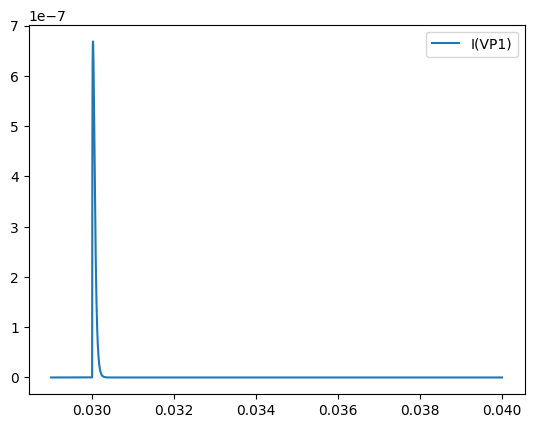

plot: mem_cap_test_v_0_4_2.cir.prn


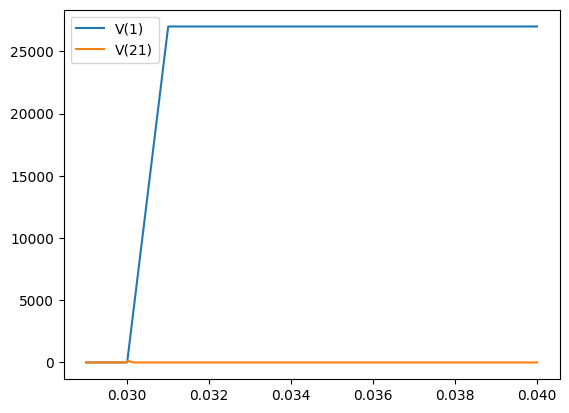

start:0 end:0
Series([], Name: I(VP1), dtype: float64)
Displ vol:5.1657641602791296e-11
vol limit:5.4954935999999995e-11
5.1396241601552696e-11


In [42]:
# nlin 3 - using a hyperbolic function 
#import plot_result
#from plot_result import sum_cur

cir = 'mem_cap_test_v_0_4_2.cir'
prn_f = mem_t_dir+'/results/'+cir+'.prn'
run_and_plot(lib, cir, plot_type="flow")
plot_r(prn_f, plot_type='voltage')

res = plot_result.load_prn(prn_f)
tim  = res['TIME'] 
I_vp = res['I(VP1)']

I_vp_t = sum_cur(tim, I_vp)#, [0.02, 0.05])

print("Displ vol:"+str(I_vp_t))

vol_lim = 3.141*540e-6**2*60e-6
print("vol limit:"+str(vol_lim))
P_in = 27000

print(vol_comp(60e-6, P_in))



Xyce -plugin ./../../Components/verilogA_build/lib/MFXyce.so /home/u1146591/MFDA/h.r.3.3_pdk/xyce_testing/JupyterTesting/../MFlibrary_testing/stdcellTesting/membrane_cap/mem_cap_test_v_0_4_1.3_1.cir > /home/u1146591/MFDA/h.r.3.3_pdk/xyce_testing/JupyterTesting/../MFlibrary_testing/stdcellTesting/membrane_cap/mem_cap_test_v_0_4_1.3_1.cir.log
Xyce -plugin ./../../Components/verilogA_build/lib/MFXyce.so /home/u1146591/MFDA/h.r.3.3_pdk/xyce_testing/JupyterTesting/../MFlibrary_testing/stdcellTesting/membrane_cap/mem_cap_test_v_0_4_1.3_1.cir > /home/u1146591/MFDA/h.r.3.3_pdk/xyce_testing/JupyterTesting/../MFlibrary_testing/stdcellTesting/membrane_cap/mem_cap_test_v_0_4_1.3_1.cir.log
plot: mem_cap_test_v_0_4_1.3_1.cir.prn


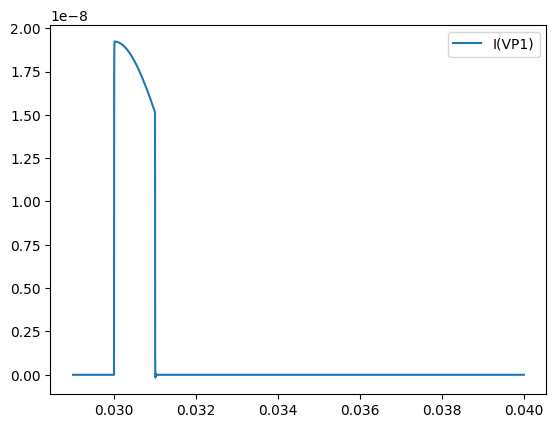

plot: mem_cap_test_v_0_4_1.3_1.cir.prn


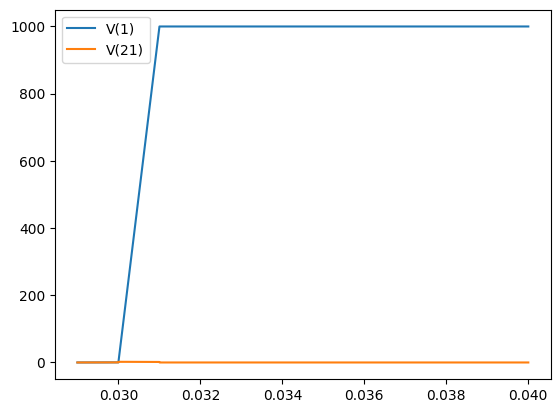

Index
132    0.000000e+00
133    9.760669e-12
134    1.779158e-11
135    3.384668e-11
136    6.591666e-11
           ...     
286    1.120945e-09
287   -1.555014e-10
288    7.016268e-11
289   -3.165752e-11
290    1.695160e-11
Name: I(VP1), Length: 159, dtype: float64
Displ vol:3.526819610616054e-13
vol limit:5.4954935999999995e-11


NameError: name 'vol_comp' is not defined

In [7]:
cir = 'mem_cap_test_v_0_4_1.3_1.cir'
prn_f = mem_t_dir+'/results/'+cir+'.prn'
run_and_plot(lib, cir, plot_type="flow")
plot_r(prn_f, plot_type='voltage')

res = plot_result.load_prn(prn_f)
tim  = res['TIME'] 
I_vp = res['I(VP1)']

I_vp_t = sum_cur(tim, I_vp, [0.030, 0.03104])

print("Displ vol:"+str(I_vp_t))

vol_lim = 3.141*540e-6**2*60e-6
print("vol limit:"+str(vol_lim))

P_in = 1000
print(vol_comp(60e-6, P_in))

Xyce -plugin ./../../Components/verilogA_build/lib/MFXyce.so /home/u1146591/MFDA/h.r.3.3_pdk/xyce_testing/JupyterTesting/../MFlibrary_testing/stdcellTesting/membrane_cap/mem_cap_test_v_0_4_2.3_1.cir > /home/u1146591/MFDA/h.r.3.3_pdk/xyce_testing/JupyterTesting/../MFlibrary_testing/stdcellTesting/membrane_cap/mem_cap_test_v_0_4_2.3_1.cir.log
Xyce -plugin ./../../Components/verilogA_build/lib/MFXyce.so /home/u1146591/MFDA/h.r.3.3_pdk/xyce_testing/JupyterTesting/../MFlibrary_testing/stdcellTesting/membrane_cap/mem_cap_test_v_0_4_2.3_1.cir > /home/u1146591/MFDA/h.r.3.3_pdk/xyce_testing/JupyterTesting/../MFlibrary_testing/stdcellTesting/membrane_cap/mem_cap_test_v_0_4_2.3_1.cir.log
plot: mem_cap_test_v_0_4_2.3_1.cir.prn


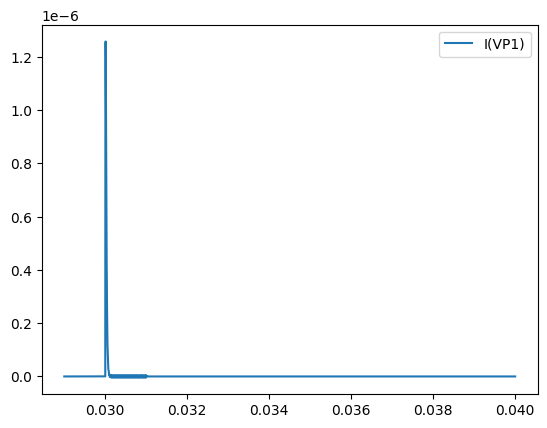

plot: mem_cap_test_v_0_4_2.3_1.cir.prn


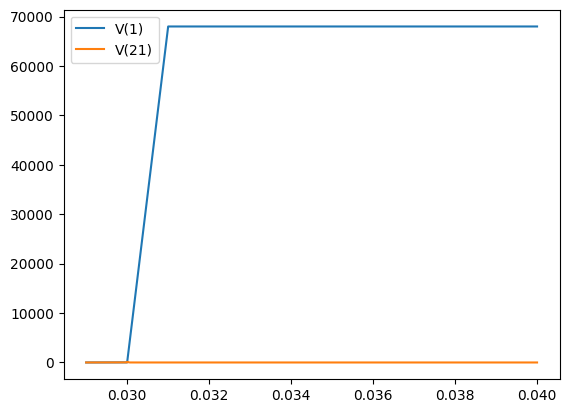

132
294
start:132 end:294
Index
132    0.000000e+00
133    4.150259e-11
134    8.300386e-11
135    1.660038e-10
136    3.319878e-10
           ...     
289    0.000000e+00
290    0.000000e+00
291    0.000000e+00
292    0.000000e+00
293    0.000000e+00
Name: I(VP1), Length: 162, dtype: float64
Displ vol:2.2526312340295644e-11
vol limit:5.4954935999999995e-11
3.64634174798368e-11


In [50]:
cir = 'mem_cap_test_v_0_4_2.3_1.cir'
prn_f = mem_t_dir+'/results/'+cir+'.prn'
run_and_plot(lib, cir, plot_type="flow")
plot_r(prn_f, plot_type='voltage')

res = plot_result.load_prn(prn_f)
tim  = res['TIME'] 
I_vp = res['I(VP1)']

I_vp_t = sum_cur(tim, I_vp, [0.030, 0.03104])

print("Displ vol:"+str(I_vp_t))

vol_lim = 3.141*540e-6**2*60e-6
print("vol limit:"+str(vol_lim))

P_in = 1000
print(vol_comp(60e-6, P_in))

Xyce -plugin ./../../Components/verilogA_build/lib/MFXyce.so /home/u1146591/MFDA/h.r.3.3_pdk/xyce_testing/JupyterTesting/../MFlibrary_testing/stdcellTesting/membrane_cap/mem_cap_test_v_0_4_3.3_1.cir > /home/u1146591/MFDA/h.r.3.3_pdk/xyce_testing/JupyterTesting/../MFlibrary_testing/stdcellTesting/membrane_cap/mem_cap_test_v_0_4_3.3_1.cir.log
Xyce -plugin ./../../Components/verilogA_build/lib/MFXyce.so /home/u1146591/MFDA/h.r.3.3_pdk/xyce_testing/JupyterTesting/../MFlibrary_testing/stdcellTesting/membrane_cap/mem_cap_test_v_0_4_3.3_1.cir > /home/u1146591/MFDA/h.r.3.3_pdk/xyce_testing/JupyterTesting/../MFlibrary_testing/stdcellTesting/membrane_cap/mem_cap_test_v_0_4_3.3_1.cir.log
plot: mem_cap_test_v_0_4_3.3_1.cir.prn


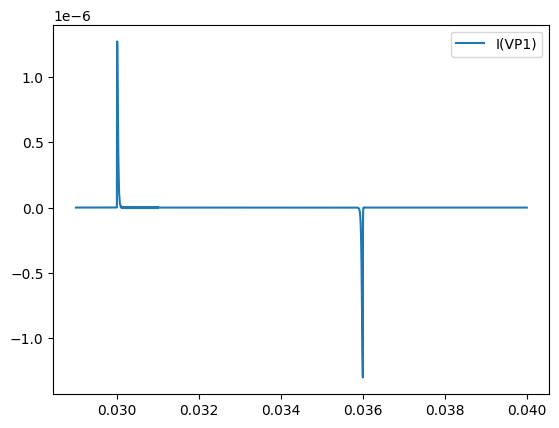

plot: mem_cap_test_v_0_4_3.3_1.cir.prn


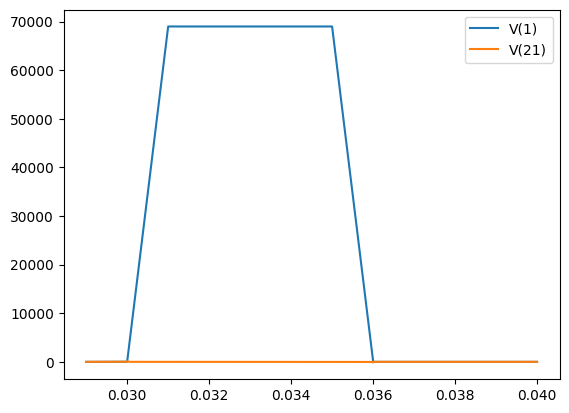

132
294
start:132 end:294
Index
132    0.000000e+00
133    4.211292e-11
134    8.422451e-11
135    1.684450e-10
136    3.368700e-10
           ...     
289    0.000000e+00
290    0.000000e+00
291    9.074007e-49
292   -1.814838e-49
293   -7.864053e-49
Name: I(VP1), Length: 162, dtype: float64
Displ vol:2.285758148858234e-11
vol limit:5.4954935999999995e-11
3.64634174798368e-11


In [51]:
cir = 'mem_cap_test_v_0_4_3.3_1.cir'
prn_f = mem_t_dir+'/results/'+cir+'.prn'
run_and_plot(lib, cir, plot_type="flow")
plot_r(prn_f, plot_type='voltage')

res = plot_result.load_prn(prn_f)
tim  = res['TIME'] 
I_vp = res['I(VP1)']

I_vp_t = sum_cur(tim, I_vp, [0.030, 0.03104])

print("Displ vol:"+str(I_vp_t))

vol_lim = 3.141*540e-6**2*60e-6
print("vol limit:"+str(vol_lim))

P_in = 1000
print(vol_comp(60e-6, P_in))

Xyce -plugin ./../../Components/verilogA_build/lib/MFXyce.so /home/u1146591/MFDA/h.r.3.3_pdk/xyce_testing/JupyterTesting/../MFlibrary_testing/stdcellTesting/membrane_cap/mem_cap_test_v_0_4_1.4.cir > /home/u1146591/MFDA/h.r.3.3_pdk/xyce_testing/JupyterTesting/../MFlibrary_testing/stdcellTesting/membrane_cap/mem_cap_test_v_0_4_1.4.cir.log
Xyce -plugin ./../../Components/verilogA_build/lib/MFXyce.so /home/u1146591/MFDA/h.r.3.3_pdk/xyce_testing/JupyterTesting/../MFlibrary_testing/stdcellTesting/membrane_cap/mem_cap_test_v_0_4_1.4.cir > /home/u1146591/MFDA/h.r.3.3_pdk/xyce_testing/JupyterTesting/../MFlibrary_testing/stdcellTesting/membrane_cap/mem_cap_test_v_0_4_1.4.cir.log
plot: mem_cap_test_v_0_4_1.4.cir.prn


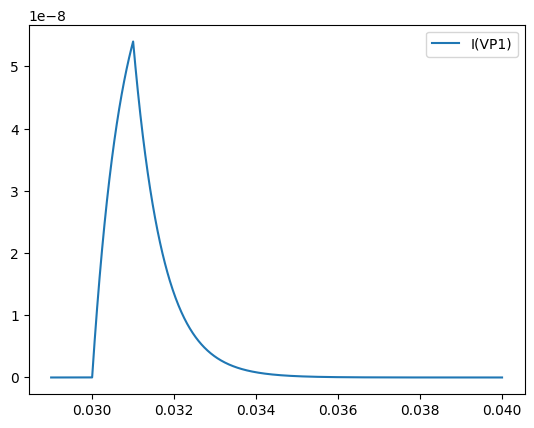

plot: mem_cap_test_v_0_4_1.4.cir.prn


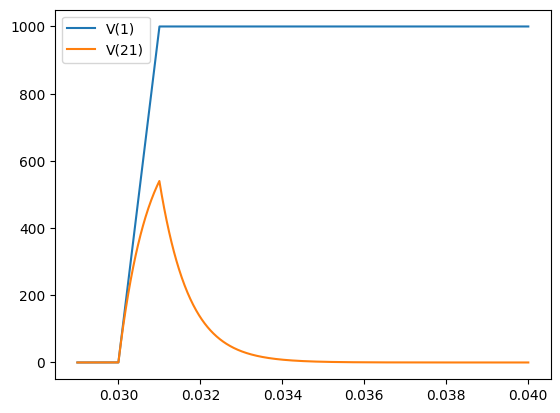

start:0 end:0
Series([], Name: I(VP1), dtype: float64)
Displ vol:7.190692533262252e-11
vol limit:5.4954935999999995e-11
3.64634174798368e-11


In [81]:
cir = 'mem_cap_test_v_0_4_1.4.cir'
prn_f = mem_t_dir+'/results/'+cir+'.prn'
run_and_plot(lib, cir, plot_type="flow")
plot_r(prn_f, plot_type='voltage')

res = plot_result.load_prn(prn_f)
tim  = res['TIME'] 
I_vp = res['I(VP1)']

I_vp_t = plot_result.sum_cur(tim, I_vp)#, [0.02, 0.05])

print("Displ vol:"+str(I_vp_t))

vol_lim = 3.141*540e-6**2*60e-6
print("vol limit:"+str(vol_lim))

P_in = 1000
print(vol_comp(60e-6, P_in))

Xyce -plugin ./../../Components/verilogA_build/lib/MFXyce.so /home/u1146591/MFDA/h.r.3.3_pdk/xyce_testing/JupyterTesting/../MFlibrary_testing/stdcellTesting/membrane_cap/mem_cap_test_v_0_4_2.4.cir > /home/u1146591/MFDA/h.r.3.3_pdk/xyce_testing/JupyterTesting/../MFlibrary_testing/stdcellTesting/membrane_cap/mem_cap_test_v_0_4_2.4.cir.log
Xyce -plugin ./../../Components/verilogA_build/lib/MFXyce.so /home/u1146591/MFDA/h.r.3.3_pdk/xyce_testing/JupyterTesting/../MFlibrary_testing/stdcellTesting/membrane_cap/mem_cap_test_v_0_4_2.4.cir > /home/u1146591/MFDA/h.r.3.3_pdk/xyce_testing/JupyterTesting/../MFlibrary_testing/stdcellTesting/membrane_cap/mem_cap_test_v_0_4_2.4.cir.log
plot: mem_cap_test_v_0_4_2.4.cir.prn


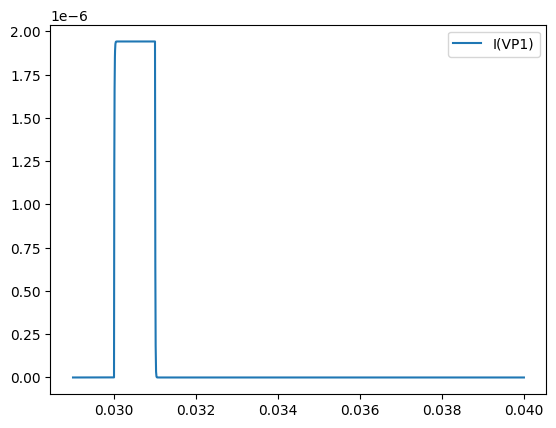

plot: mem_cap_test_v_0_4_2.4.cir.prn


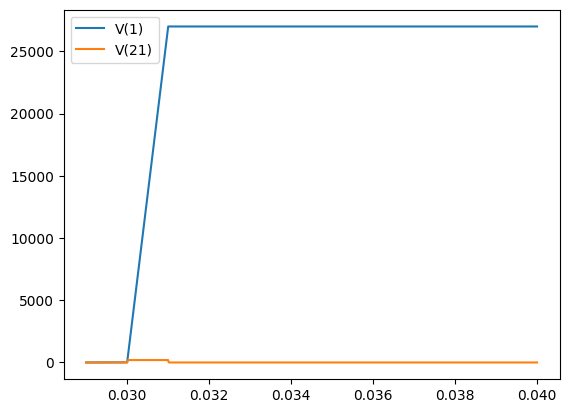

start:0 end:0
Series([], Name: I(VP1), dtype: float64)
Displ vol:1.9417102272210854e-09
vol limit:5.4954935999999995e-11
5.1396241601552696e-11


In [40]:
cir = 'mem_cap_test_v_0_4_2.4.cir'
prn_f = mem_t_dir+'/results/'+cir+'.prn'
run_and_plot(lib, cir, plot_type="flow")
plot_r(prn_f, plot_type='voltage')

res = plot_result.load_prn(prn_f)
tim  = res['TIME'] 
I_vp = res['I(VP1)']

I_vp_t = plot_result.sum_cur(tim, I_vp)#, [0.02, 0.05])

print("Displ vol:"+str(I_vp_t))

vol_lim = 3.141*540e-6**2*60e-6
print("vol limit:"+str(vol_lim))

P_in = 27000
print(vol_comp(60e-6, P_in))
# - 1.9414838713895194e-09

Xyce -plugin ./../../Components/verilogA_build/lib/MFXyce.so /home/u1146591/MFDA/h.r.3.3_pdk/xyce_testing/JupyterTesting/../MFlibrary_testing/stdcellTesting/membrane_cap/mem_cap_test_v_0_4_1.5_1.cir > /home/u1146591/MFDA/h.r.3.3_pdk/xyce_testing/JupyterTesting/../MFlibrary_testing/stdcellTesting/membrane_cap/mem_cap_test_v_0_4_1.5_1.cir.log
Xyce -plugin ./../../Components/verilogA_build/lib/MFXyce.so /home/u1146591/MFDA/h.r.3.3_pdk/xyce_testing/JupyterTesting/../MFlibrary_testing/stdcellTesting/membrane_cap/mem_cap_test_v_0_4_1.5_1.cir > /home/u1146591/MFDA/h.r.3.3_pdk/xyce_testing/JupyterTesting/../MFlibrary_testing/stdcellTesting/membrane_cap/mem_cap_test_v_0_4_1.5_1.cir.log
plot: mem_cap_test_v_0_4_1.5_1.cir.prn


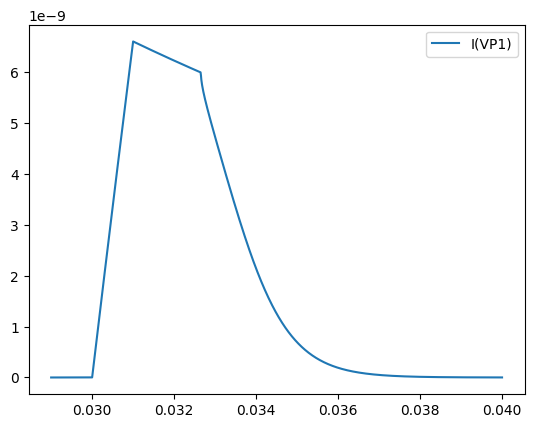

plot: mem_cap_test_v_0_4_1.5_1.cir.prn


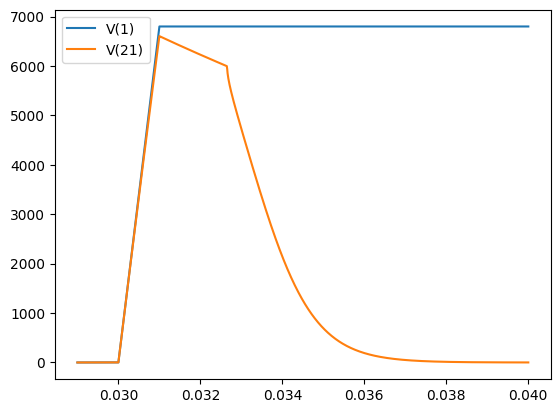

start:0 end:0
Series([], Name: I(VP1), dtype: float64)
Displ vol:2.078191086878061e-11
vol limit:5.4954935999999995e-11
2.078265617597897e-11


In [35]:
cir = 'mem_cap_test_v_0_4_1.5_1.cir'
prn_f = mem_t_dir+'/results/'+cir+'.prn'
run_and_plot(lib, cir, plot_type="flow")
plot_r(prn_f, plot_type='voltage')

res = plot_result.load_prn(prn_f)
tim  = res['TIME'] 
I_vp = res['I(VP1)']

I_vp_t = plot_result.sum_cur(tim, I_vp)#, [0.02, 0.05])

print("Displ vol:"+str(I_vp_t))

vol_lim = 3.141*540e-6**2*60e-6
print("vol limit:"+str(vol_lim))

P_in = 6800
print(vol_comp_5(60e-6, P_in))

Xyce -plugin ./../../Components/verilogA_build/lib/MFXyce.so /home/u1146591/MFDA/h.r.3.3_pdk/xyce_testing/JupyterTesting/../MFlibrary_testing/stdcellTesting/membrane_cap/mem_cap_test_v_0_4_2.5_1.cir > /home/u1146591/MFDA/h.r.3.3_pdk/xyce_testing/JupyterTesting/../MFlibrary_testing/stdcellTesting/membrane_cap/mem_cap_test_v_0_4_2.5_1.cir.log
Xyce -plugin ./../../Components/verilogA_build/lib/MFXyce.so /home/u1146591/MFDA/h.r.3.3_pdk/xyce_testing/JupyterTesting/../MFlibrary_testing/stdcellTesting/membrane_cap/mem_cap_test_v_0_4_2.5_1.cir > /home/u1146591/MFDA/h.r.3.3_pdk/xyce_testing/JupyterTesting/../MFlibrary_testing/stdcellTesting/membrane_cap/mem_cap_test_v_0_4_2.5_1.cir.log
plot: mem_cap_test_v_0_4_2.5_1.cir.prn


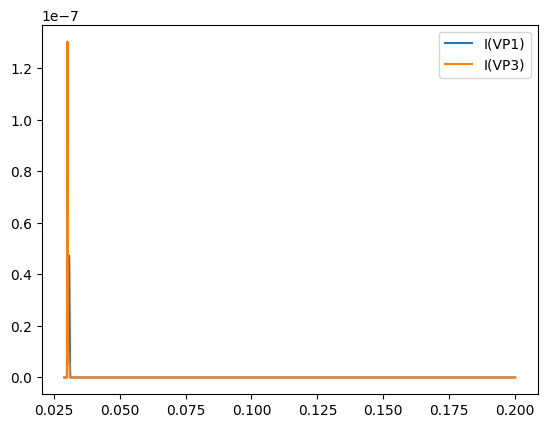

plot: mem_cap_test_v_0_4_2.5_1.cir.prn


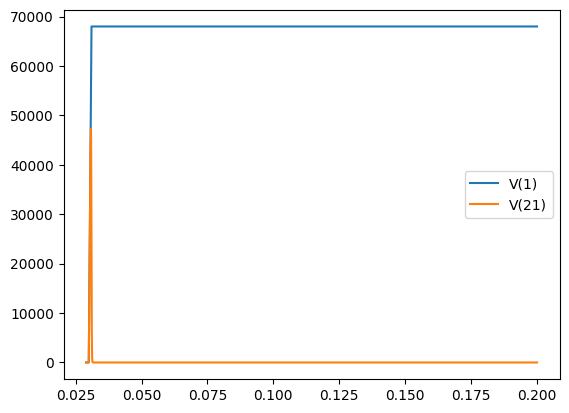


*.options linsol type=klu

vs 1 0 PWL(0s 0V 30ms 0V 31ms 6.8e4V 1s 6.8e4V )

r1 22 21 1e12
Ymembrane_cap_20pxV_nlin_5_1 mem1 2 21 mem_r=540e-6 fl_ch_h=60e-6
*C_res=1e1


* probe sources
vp1 1  2 0V
vp2 0 22 0V

vs1 101 0 PWL(0s 0V 60ms 0V 61ms 6.8e4V 1s 6.8e4V)

vp3 1  62 0V
vp4 0  72 0V

r2 72 71 1e11
*Yvalve_sw_20px_1_V           valv1 61 62 101 0 threshold_pressure_kPa=60e3
Ymembrane_cap_20pxV_nlin_5_1 mem2  71 62 mem_r=540e-6 fl_ch_h=60e-6

.tran 0.001ms 200ms 29ms 0.01ms
.print tran I(vp1) I(vp3) V(1) V(21)
.end
start:0 end:0
Series([], Name: I(VP1), dtype: float64)
start:0 end:0
Series([], Name: I(VP3), dtype: float64)
Displ vol:3.224444181466326e-11
Displ vol:3.224754694294811e-11
vol limit:5.4954935999999995e-11
3.2247982908632625e-11


In [80]:
cir = 'mem_cap_test_v_0_4_2.5_1.cir'
prn_f = mem_t_dir+'/results/'+cir+'.prn'
run_and_plot(lib, cir, plot_type="flow")
plot_r(prn_f, plot_type='voltage')

res = plot_result.load_prn(prn_f)

with open(mem_t_dir+'/'+cir, 'r') as f:
    for l in f:
        print(l.replace('\n', ''))

tim  = res['TIME'] 
I_vp1 = res['I(VP1)']
I_vp3 = res['I(VP3)']

I_vp1_t = plot_result.sum_cur(tim, I_vp1)#, [0.02, 0.05])
I_vp3_t = plot_result.sum_cur(tim, I_vp3)#, [0.02, 0.05])

print("Displ vol:"+str(I_vp1_t))
print("Displ vol:"+str(I_vp3_t))

vol_lim = 3.141*540e-6**2*60e-6
print("vol limit:"+str(vol_lim))

P_in = 68000
print(vol_comp_5(60e-6, P_in))

Xyce -plugin ./../../Components/verilogA_build/lib/MFXyce.so /home/u1146591/MFDA/h.r.3.3_pdk/xyce_testing/JupyterTesting/../MFlibrary_testing/stdcellTesting/membrane_cap/mem_cap_test_v_0_4_3.5_1.cir > /home/u1146591/MFDA/h.r.3.3_pdk/xyce_testing/JupyterTesting/../MFlibrary_testing/stdcellTesting/membrane_cap/mem_cap_test_v_0_4_3.5_1.cir.log
Xyce -plugin ./../../Components/verilogA_build/lib/MFXyce.so /home/u1146591/MFDA/h.r.3.3_pdk/xyce_testing/JupyterTesting/../MFlibrary_testing/stdcellTesting/membrane_cap/mem_cap_test_v_0_4_3.5_1.cir > /home/u1146591/MFDA/h.r.3.3_pdk/xyce_testing/JupyterTesting/../MFlibrary_testing/stdcellTesting/membrane_cap/mem_cap_test_v_0_4_3.5_1.cir.log
plot: mem_cap_test_v_0_4_3.5_1.cir.prn


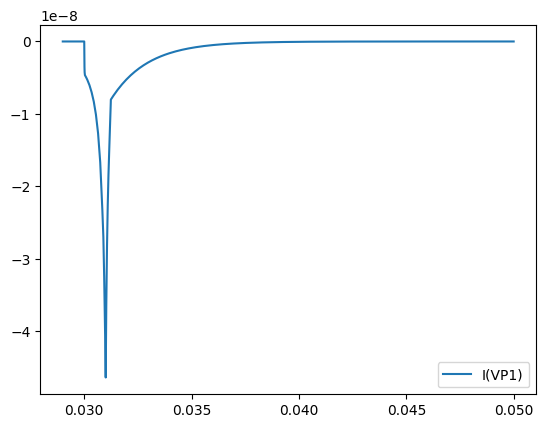

plot: mem_cap_test_v_0_4_3.5_1.cir.prn


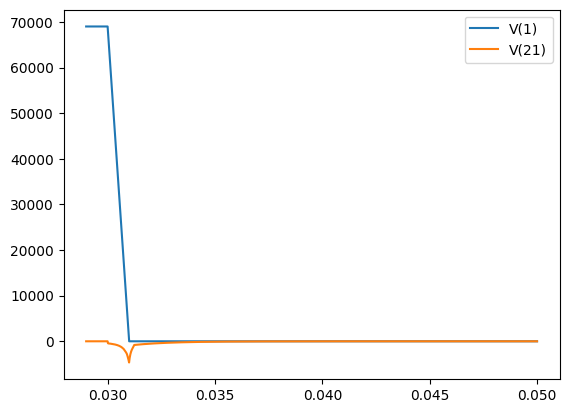


*.options linsol type=klu

vs 1 0 PWL(0s 69kV 30ms 69kV 31ms 0V 35ms 0V 36ms 0V 1100.0ms 0V)

r1 22 21 1e11
Ymembrane_cap_20pxV_nlin_5_1 mem1 2 21 mem_r=540e-6 fl_ch_h=60e-6
*C_res=1e1


* probe sources
vp1 1 2 0V
vp2 0 22 0V

.tran 0.01ms 50ms 29ms 0.1ms
.print tran I(vp1) V(1) V(21)
.end
start:0 end:0
Series([], Name: I(VP1), dtype: float64)
13
119
start:13 end:119
Index
13     2.723839e-23
14    -1.781775e-09
15    -2.743579e-09
16    -3.507461e-09
17    -4.256100e-09
           ...     
114   -2.060655e-09
115   -1.943332e-09
116   -1.832688e-09
117   -1.728344e-09
118   -1.629940e-09
Name: I(VP1), Length: 106, dtype: float64
Displ vol:-3.220167417474596e-11
Displ vol in:-2.740457749698332e-11
vol limit:5.4954935999999995e-11
3.2314426415888865e-11


In [64]:
cir = 'mem_cap_test_v_0_4_3.5_1.cir'
prn_f = mem_t_dir+'/results/'+cir+'.prn'
run_and_plot(lib, cir, plot_type="flow")
plot_r(prn_f, plot_type='voltage')

res = plot_result.load_prn(prn_f)

with open(mem_t_dir+'/'+cir, 'r') as f:
    for l in f:
        print(l.replace('\n', ''))

tim  = res['TIME'] 
I_vp = res['I(VP1)']

I_vp_t  = plot_result.sum_cur(tim, I_vp)#, [0.02, 0.05])
I_vp_t1 = plot_result.sum_cur(tim, I_vp, [0.03,0.034])

print("Displ vol:"+str(I_vp_t))
print("Displ vol in:"+str(I_vp_t1))

vol_lim = 3.141*540e-6**2*60e-6
print("vol limit:"+str(vol_lim))

P_in = 69000
print(vol_comp_5(60e-6, P_in))

Xyce -plugin ./../../Components/verilogA_build/lib/MFXyce.so /home/u1146591/MFDA/h.r.3.3_pdk/xyce_testing/JupyterTesting/../MFlibrary_testing/stdcellTesting/membrane_cap/mem_cap_test_v_0_4_4.5_1.cir > /home/u1146591/MFDA/h.r.3.3_pdk/xyce_testing/JupyterTesting/../MFlibrary_testing/stdcellTesting/membrane_cap/mem_cap_test_v_0_4_4.5_1.cir.log
Xyce -plugin ./../../Components/verilogA_build/lib/MFXyce.so /home/u1146591/MFDA/h.r.3.3_pdk/xyce_testing/JupyterTesting/../MFlibrary_testing/stdcellTesting/membrane_cap/mem_cap_test_v_0_4_4.5_1.cir > /home/u1146591/MFDA/h.r.3.3_pdk/xyce_testing/JupyterTesting/../MFlibrary_testing/stdcellTesting/membrane_cap/mem_cap_test_v_0_4_4.5_1.cir.log
plot: mem_cap_test_v_0_4_4.5_1.cir.prn


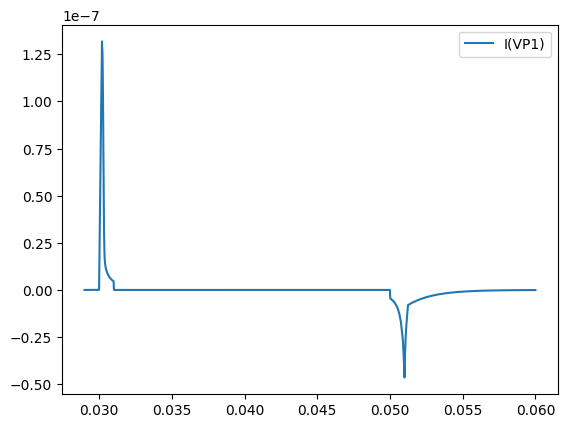

plot: mem_cap_test_v_0_4_4.5_1.cir.prn


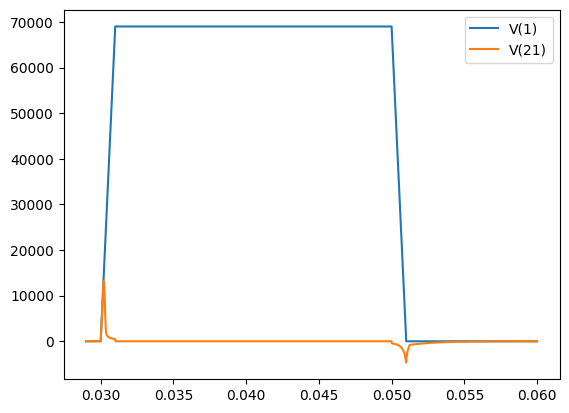


*.options linsol type=klu

vs 1 0 PWL(0s 0kV 30ms 0kV 31ms 69kV 50ms 69kV 51ms 0V 1100.0ms 0V)

r1 22 21 1e11
Ymembrane_cap_20pxV_nlin_5_1 mem1 2 21 mem_r=540e-6 fl_ch_h=60e-6
*C_res=1e1


* probe sources
vp1 1 2 0V
vp2 0 22 0V

.tran 0.01ms 60ms 29ms 0.1ms
.print tran I(vp1) V(1) V(21)
.end
start:0 end:0
Series([], Name: I(VP1), dtype: float64)
13
118
start:13 end:118
Index
13     0.000000e+00
14     1.052856e-13
15     3.158569e-13
16     7.369993e-13
17     1.579284e-12
           ...     
113    4.134438e-15
114   -3.171520e-15
115    2.432867e-15
116   -1.866247e-15
117    1.431595e-15
Name: I(VP1), Length: 105, dtype: float64
Displ vol:1.632274109230943e-13
Displ vol in:6.716874170594724e-11
vol limit:5.4954935999999995e-11
3.2314426415888865e-11


In [66]:
cir = 'mem_cap_test_v_0_4_4.5_1.cir'
prn_f = mem_t_dir+'/results/'+cir+'.prn'
run_and_plot(lib, cir, plot_type="flow")
plot_r(prn_f, plot_type='voltage')

res = plot_result.load_prn(prn_f)

with open(mem_t_dir+'/'+cir, 'r') as f:
    for l in f:
        print(l.replace('\n', ''))

tim  = res['TIME'] 
I_vp = res['I(VP1)']

I_vp_t  = plot_result.sum_cur(tim, I_vp)#, [0.02, 0.05])
I_vp_t1 = plot_result.sum_cur(tim, I_vp, [0.03,0.034])

print("Displ vol:"+str(I_vp_t))
print("Displ vol in:"+str(I_vp_t1))

vol_lim = 3.141*540e-6**2*60e-6
print("vol limit:"+str(vol_lim))

P_in = 69000
print(vol_comp_5(60e-6, P_in))

Xyce -plugin ./../../Components/verilogA_build/lib/MFXyce.so /home/u1146591/MFDA/h.r.3.3_pdk/xyce_testing/JupyterTesting/../MFlibrary_testing/stdcellTesting/membrane_cap/mem_cap_test_v_0_4_2.5_1_0.1ms.cir > /home/u1146591/MFDA/h.r.3.3_pdk/xyce_testing/JupyterTesting/../MFlibrary_testing/stdcellTesting/membrane_cap/mem_cap_test_v_0_4_2.5_1_0.1ms.cir.log
Xyce -plugin ./../../Components/verilogA_build/lib/MFXyce.so /home/u1146591/MFDA/h.r.3.3_pdk/xyce_testing/JupyterTesting/../MFlibrary_testing/stdcellTesting/membrane_cap/mem_cap_test_v_0_4_2.5_1_0.1ms.cir > /home/u1146591/MFDA/h.r.3.3_pdk/xyce_testing/JupyterTesting/../MFlibrary_testing/stdcellTesting/membrane_cap/mem_cap_test_v_0_4_2.5_1_0.1ms.cir.log
plot: mem_cap_test_v_0_4_2.5_1_0.1ms.cir.prn


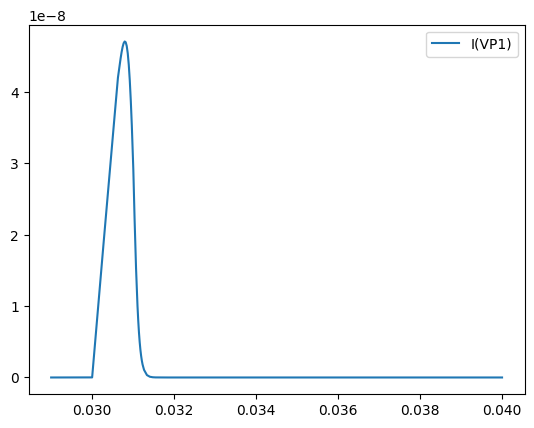

plot: mem_cap_test_v_0_4_2.5_1_0.1ms.cir.prn


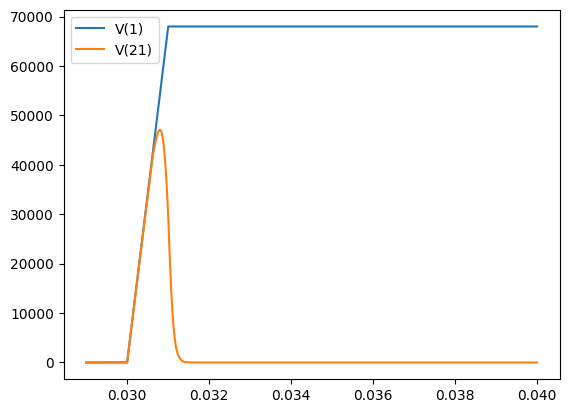


*.options linsol type=klu

vs 1 0 PWL(0s 0V 30ms 0V 31ms 6.8e4V 110ms 6.8e4V 161ms 0V 1100.0ms 0V)

r1 0 21 1e12
Ymembrane_cap_20pxV_nlin_5_1 mem1 2 21 mem_r=540e-6 fl_ch_h=60e-6
*C_res=1e1


* probe sources
vp1 1 2 0V

.tran 0.01ms 40ms 29ms 0.1ms
.print tran I(vp1) V(1) V(21)
.end
start:0 end:0
Series([], Name: I(VP1), dtype: float64)
Displ vol:3.211294332529834e-11
vol limit:5.4954935999999995e-11
3.2247982908632625e-11


In [37]:
cir = 'mem_cap_test_v_0_4_2.5_1_0.1ms.cir'
prn_f = mem_t_dir+'/results/'+cir+'.prn'
run_and_plot(lib, cir, plot_type="flow")
plot_r(prn_f, plot_type='voltage')

res = plot_result.load_prn(prn_f)

with open(mem_t_dir+'/'+cir, 'r') as f:
    for l in f:
        print(l.replace('\n', ''))

tim  = res['TIME'] 
I_vp = res['I(VP1)']

I_vp_t = plot_result.sum_cur(tim, I_vp)#, [0.02, 0.05])

print("Displ vol:"+str(I_vp_t))

vol_lim = 3.141*540e-6**2*60e-6
print("vol limit:"+str(vol_lim))

P_in = 68000
print(vol_comp_5(60e-6, P_in))

Xyce -plugin ./../../Components/verilogA_build/lib/MFXyce.so /home/u1146591/MFDA/h.r.3.3_pdk/xyce_testing/JupyterTesting/../MFlibrary_testing/stdcellTesting/membrane_cap/mem_cap_test_v_0_4_2.5_1_1.0ms.cir > /home/u1146591/MFDA/h.r.3.3_pdk/xyce_testing/JupyterTesting/../MFlibrary_testing/stdcellTesting/membrane_cap/mem_cap_test_v_0_4_2.5_1_1.0ms.cir.log
Xyce -plugin ./../../Components/verilogA_build/lib/MFXyce.so /home/u1146591/MFDA/h.r.3.3_pdk/xyce_testing/JupyterTesting/../MFlibrary_testing/stdcellTesting/membrane_cap/mem_cap_test_v_0_4_2.5_1_1.0ms.cir > /home/u1146591/MFDA/h.r.3.3_pdk/xyce_testing/JupyterTesting/../MFlibrary_testing/stdcellTesting/membrane_cap/mem_cap_test_v_0_4_2.5_1_1.0ms.cir.log
plot: mem_cap_test_v_0_4_2.5_1_1.0ms.cir.prn


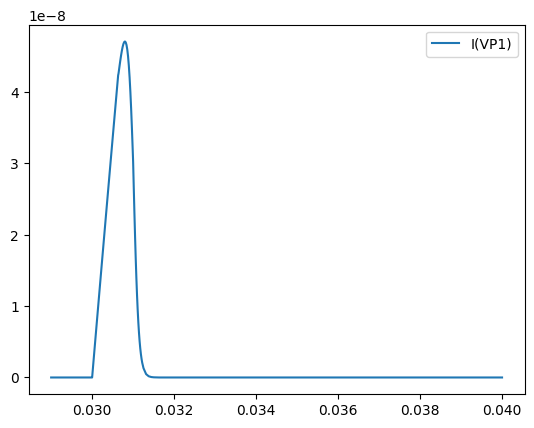

plot: mem_cap_test_v_0_4_2.5_1_1.0ms.cir.prn


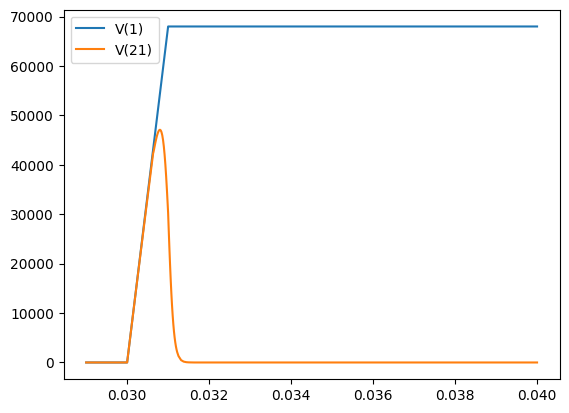


*.options linsol type=klu

vs 1 0 PWL(0s 0V 30ms 0V 31ms 6.8e4V 110ms 6.8e4V 161ms 0V 1100.0ms 0V)

r1 0 21 1e12
Ymembrane_cap_20pxV_nlin_5_1 mem1 2 21 mem_r=540e-6 fl_ch_h=60e-6
*C_res=1e1


* probe sources
vp1 1 2 0V

.tran 0.1ms 40ms 29ms 1ms
.print tran I(vp1) V(1) V(21)
.end
start:0 end:0
Series([], Name: I(VP1), dtype: float64)
Displ vol:3.2113504979490373e-11
vol limit:5.4954935999999995e-11
3.2247982908632625e-11


In [39]:
cir = 'mem_cap_test_v_0_4_2.5_1_1.0ms.cir'
prn_f = mem_t_dir+'/results/'+cir+'.prn'
run_and_plot(lib, cir, plot_type="flow")
plot_r(prn_f, plot_type='voltage')

res = plot_result.load_prn(prn_f)

with open(mem_t_dir+'/'+cir, 'r') as f:
    for l in f:
        print(l.replace('\n', ''))

tim  = res['TIME'] 
I_vp = res['I(VP1)']

I_vp_t = plot_result.sum_cur(tim, I_vp)#, [0.02, 0.05])

print("Displ vol:"+str(I_vp_t))

vol_lim = 3.141*540e-6**2*60e-6
print("vol limit:"+str(vol_lim))

P_in = 68000
print(vol_comp_5(60e-6, P_in))

Xyce -plugin ./../../Components/verilogA_build/lib/MFXyce.so /home/u1146591/MFDA/h.r.3.3_pdk/xyce_testing/JupyterTesting/../MFlibrary_testing/stdcellTesting/membrane_cap/mem_cap_test_v_0_4_2.5_1_2.0ms.cir > /home/u1146591/MFDA/h.r.3.3_pdk/xyce_testing/JupyterTesting/../MFlibrary_testing/stdcellTesting/membrane_cap/mem_cap_test_v_0_4_2.5_1_2.0ms.cir.log
Xyce -plugin ./../../Components/verilogA_build/lib/MFXyce.so /home/u1146591/MFDA/h.r.3.3_pdk/xyce_testing/JupyterTesting/../MFlibrary_testing/stdcellTesting/membrane_cap/mem_cap_test_v_0_4_2.5_1_2.0ms.cir > /home/u1146591/MFDA/h.r.3.3_pdk/xyce_testing/JupyterTesting/../MFlibrary_testing/stdcellTesting/membrane_cap/mem_cap_test_v_0_4_2.5_1_2.0ms.cir.log
plot: mem_cap_test_v_0_4_2.5_1_2.0ms.cir.prn


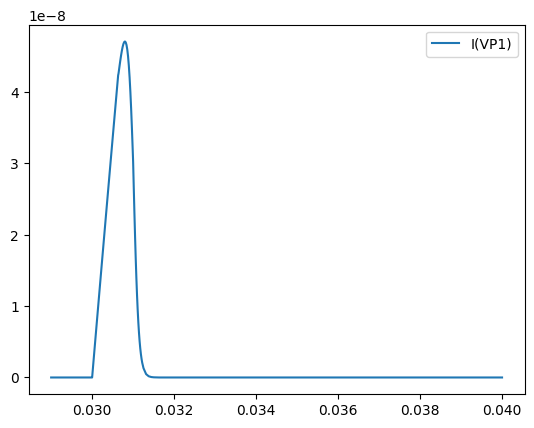

plot: mem_cap_test_v_0_4_2.5_1_2.0ms.cir.prn


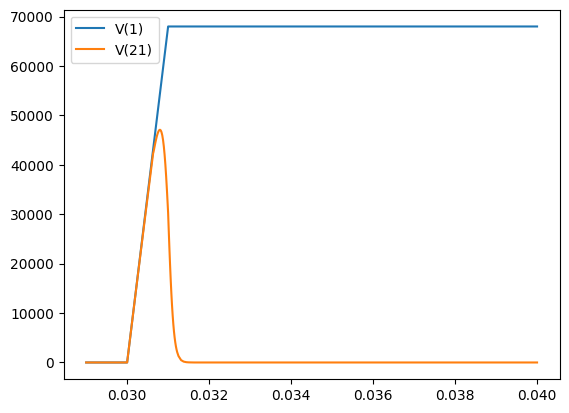


*.options linsol type=klu

vs 1 0 PWL(0s 0V 30ms 0V 31ms 6.8e4V 110ms 6.8e4V 161ms 0V 1100.0ms 0V)

r1 0 21 1e12
Ymembrane_cap_20pxV_nlin_5_1 mem1 2 21 mem_r=540e-6 fl_ch_h=60e-6
*C_res=1e1


* probe sources
vp1 1 2 0V

.tran 0.2ms 40ms 29ms 2ms
.print tran I(vp1) V(1) V(21)
.end
start:0 end:0
Series([], Name: I(VP1), dtype: float64)
Displ vol:3.211350505933362e-11
vol limit:5.4954935999999995e-11
3.2247982908632625e-11


In [40]:
cir = 'mem_cap_test_v_0_4_2.5_1_2.0ms.cir'
prn_f = mem_t_dir+'/results/'+cir+'.prn'
run_and_plot(lib, cir, plot_type="flow")
plot_r(prn_f, plot_type='voltage')

res = plot_result.load_prn(prn_f)

with open(mem_t_dir+'/'+cir, 'r') as f:
    for l in f:
        print(l.replace('\n', ''))

tim  = res['TIME'] 
I_vp = res['I(VP1)']

I_vp_t = plot_result.sum_cur(tim, I_vp)#, [0.02, 0.05])

print("Displ vol:"+str(I_vp_t))

vol_lim = 3.141*540e-6**2*60e-6
print("vol limit:"+str(vol_lim))

P_in = 68000
print(vol_comp_5(60e-6, P_in))

Xyce -plugin ./../../Components/verilogA_build/lib/MFXyce.so /home/u1146591/MFDA/h.r.3.3_pdk/xyce_testing/JupyterTesting/../MFlibrary_testing/stdcellTesting/membrane_cap/mem_cap_test_v_0_4_2.5_1_5.0ms.cir > /home/u1146591/MFDA/h.r.3.3_pdk/xyce_testing/JupyterTesting/../MFlibrary_testing/stdcellTesting/membrane_cap/mem_cap_test_v_0_4_2.5_1_5.0ms.cir.log
Xyce -plugin ./../../Components/verilogA_build/lib/MFXyce.so /home/u1146591/MFDA/h.r.3.3_pdk/xyce_testing/JupyterTesting/../MFlibrary_testing/stdcellTesting/membrane_cap/mem_cap_test_v_0_4_2.5_1_5.0ms.cir > /home/u1146591/MFDA/h.r.3.3_pdk/xyce_testing/JupyterTesting/../MFlibrary_testing/stdcellTesting/membrane_cap/mem_cap_test_v_0_4_2.5_1_5.0ms.cir.log
plot: mem_cap_test_v_0_4_2.5_1_5.0ms.cir.prn


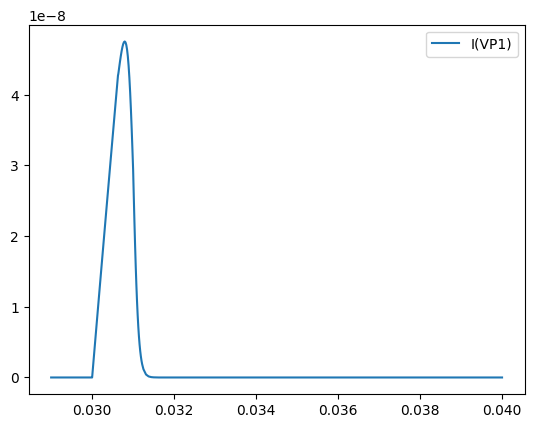

plot: mem_cap_test_v_0_4_2.5_1_5.0ms.cir.prn


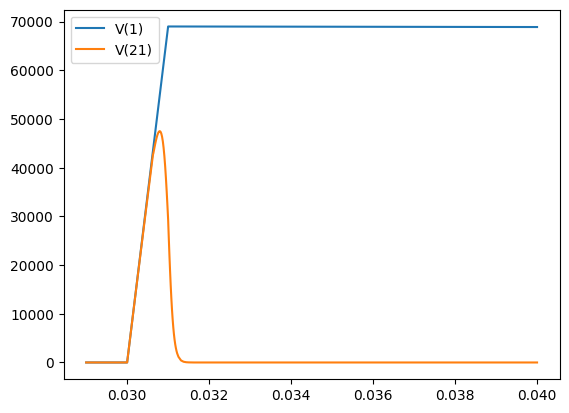


*.options linsol type=klu

vs 1 0 PWL(0s 0V 30ms 0V 31ms 69kV 110ms 6.8e4V 161ms 0V 1100.0ms 0V)

r1 0 21 1e12
Ymembrane_cap_20pxV_nlin_5_1 mem1 2 21 mem_r=540e-6 fl_ch_h=60e-6
*C_res=1e1


* probe sources
vp1 1 2 0V

.tran 0.5ms 40ms 29ms 5ms
.print tran I(vp1) V(1) V(21)
.end
start:0 end:0
Series([], Name: I(VP1), dtype: float64)
Displ vol:3.21896071469234e-11
vol limit:5.4954935999999995e-11
3.2247982908632625e-11


In [42]:
cir = 'mem_cap_test_v_0_4_2.5_1_5.0ms.cir'
prn_f = mem_t_dir+'/results/'+cir+'.prn'
run_and_plot(lib, cir, plot_type="flow")
plot_r(prn_f, plot_type='voltage')

res = plot_result.load_prn(prn_f)

with open(mem_t_dir+'/'+cir, 'r') as f:
    for l in f:
        print(l.replace('\n', ''))

tim  = res['TIME'] 
I_vp = res['I(VP1)']

I_vp_t = plot_result.sum_cur(tim, I_vp)#, [0.02, 0.05])

print("Displ vol:"+str(I_vp_t))

vol_lim = 3.141*540e-6**2*60e-6
print("vol limit:"+str(vol_lim))

P_in = 68000
print(vol_comp_5(60e-6, P_in))

In [308]:
print(res['TIME'])

Index
0        0.000000
1        0.000010
2        0.000020
3        0.000030
4        0.000040
           ...   
10054    0.099966
10055    0.099976
10056    0.099986
10057    0.099996
10058    0.100000
Name: TIME, Length: 10059, dtype: float64


Xyce -plugin ./../../Components/verilogA_build/lib/MFXyce.so /home/u1146591/MFDA/h.r.3.3_pdk/xyce_testing/JupyterTesting/../MFlibrary_testing/stdcellTesting/membrane_cap/mem_cap_test_v_0_4_1.4.0v.cir > /home/u1146591/MFDA/h.r.3.3_pdk/xyce_testing/JupyterTesting/../MFlibrary_testing/stdcellTesting/membrane_cap/mem_cap_test_v_0_4_1.4.0v.cir.log
Xyce -plugin ./../../Components/verilogA_build/lib/MFXyce.so /home/u1146591/MFDA/h.r.3.3_pdk/xyce_testing/JupyterTesting/../MFlibrary_testing/stdcellTesting/membrane_cap/mem_cap_test_v_0_4_1.4.0v.cir > /home/u1146591/MFDA/h.r.3.3_pdk/xyce_testing/JupyterTesting/../MFlibrary_testing/stdcellTesting/membrane_cap/mem_cap_test_v_0_4_1.4.0v.cir.log
plot: mem_cap_test_v_0_4_1.4.0v.cir.prn


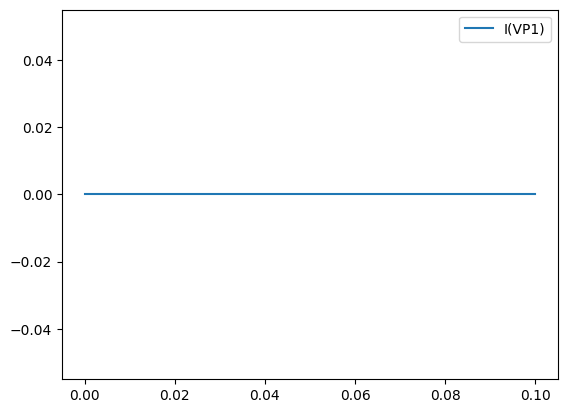

plot: mem_cap_test_v_0_4_1.4.0v.cir.prn


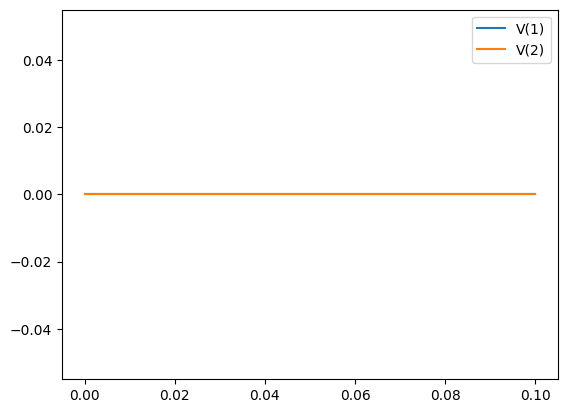

Displ vol:0.0
vol limit:5.4954935999999995e-11


In [288]:
cir = 'mem_cap_test_v_0_4_1.4.0v.cir'
prn_f = mem_t_dir+'/results/'+cir+'.prn'
run_and_plot(lib, cir, plot_type="flow")
plot_r(prn_f, plot_type='voltage')

res = plot_result.load_prn(prn_f)
tim  = res['TIME'] 
I_vp = res['I(VP1)']

I_vp_t = sum_cur(tim, I_vp, [0.02, 0.04])

print("Displ vol:"+str(I_vp_t))

vol_lim = 3.141*540e-6**2*60e-6
print("vol limit:"+str(vol_lim))

In [ ]:
# nlin 3 - using a hyperbolic function 
cir = 'mem_cap_test_v_0_4_1.5.cir'
prn_f = mem_t_dir+'/results/'+cir+'.prn'
run_and_plot(lib, cir, plot_type="flow")
plot_r(prn_f, plot_type='voltage')

res = plot_result.load_prn(prn_f)
tim  = res['TIME'] 
I_vp = res['I(VP1)']

I_vp_t = sum_cur(tim, I_vp, [0.030, 0.03104])

print("Displ vol:"+str(I_vp_t))

vol_lim = 3.141*540e-6**2*60e-6
print("vol limit:"+str(vol_lim))

P_in = 1000
print(vol_comp(60e-6, P_in))

cir: /home/u1146591/MFDA/h.r.3.3_pdk/xyce_testing/JupyterTesting/../MFlibrary_testing/stdcellTesting/membrane_cap/mem_cap_test_v_0_4_1.3_1.cir
mem_cap_test_v_0_4_1.3_1.cir
['./../../Components/veriloga_objects/MFXyce', '/home/u1146591/MFDA/h.r.3.3_pdk/xyce_testing/JupyterTesting/../MFlibrary_testing/stdcellTesting/membrane_cap/.mem_cap_test_v_0_4_1_src']
[['valves'], ['membrane_cap_testing'], ['membrane_cap_20pxV_nlin_3_1']]
/valves/membrane_cap_testing/membrane_cap_20pxV_nlin_3_1.va
[['valves'], ['membrane_cap_testing'], ['membrane_cap_20pxV_nlin_5_1']]
/valves/membrane_cap_testing/membrane_cap_20pxV_nlin_5_1.va
cd /home/u1146591/MFDA/h.r.3.3_pdk/xyce_testing/JupyterTesting/../MFlibrary_testing/stdcellTesting/membrane_cap/.mem_cap_test_v_0_4_1_src && buildxyceplugin -o MFXyce membrane_cap_20pxV_nlin_3_1.va membrane_cap_20pxV_nlin_5_1.va ./
Xyce -plugin /home/u1146591/MFDA/h.r.3.3_pdk/xyce_testing/JupyterTesting/../MFlibrary_testing/stdcellTesting/membrane_cap/.mem_cap_test_v_0_4_1_src

Simulation aborted due to error.  There are 0 MSG_FATAL errors and 2 MSG_ERROR
 errors


*** Xyce Abort ***
mv: cannot stat '/home/u1146591/MFDA/h.r.3.3_pdk/xyce_testing/JupyterTesting/../MFlibrary_testing/stdcellTesting/membrane_cap/mem_cap_test_v_0_4_1.3_1.cir.prn': No such file or directory


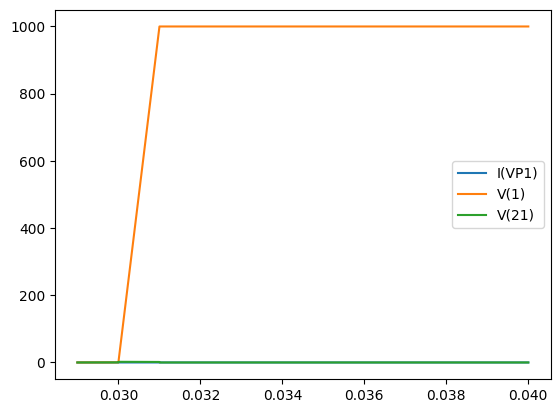

FileNotFoundError: [Errno 2] No such file or directory: '/home/u1146591/MFDA/h.r.3.3_pdk/xyce_testing/JupyterTesting/../MFlibrary_testing/stdcellTesting/membrane_cap//home/u1146591/MFDA/h.r.3.3_pdk/xyce_testing/JupyterTesting/../MFlibrary_testing/stdcellTesting/membrane_cap/mem_cap_test_v_0_4_1.3_1.cir'

In [2]:
import sys, os
sys.path.insert(0,os.getcwd()+'/../')
import plot_result
from plot_result import sum_cur
mem_t_dir = os.getcwd()+'/../MFlibrary_testing/stdcellTesting/membrane_cap'

cir =            'mem_cap_test_v_0_4_1.3_1.cir'
cir = mem_t_dir+'/mem_cap_test_v_0_4_1.3_1.cir'
print(f"cir: {cir}")

mods = [[['valves'],['membrane_cap_testing'],['membrane_cap_20pxV_nlin_3_1']],[['valves'],['membrane_cap_testing'],['membrane_cap_20pxV_nlin_5_1']]]

plot_result.build_and_run(cir, mods)
with open(mem_t_dir+'/'+cir, 'r') as f:
    for l in f:
        print(l.replace('\n', ''))

Xyce -plugin ./../../Components/verilogA_build/lib/MFXyce.so /home/u1146591/MFDA/h.r.3.3_pdk/xyce_testing/JupyterTesting/../MFlibrary_testing/stdcellTesting/membrane_cap/mem_cap_test_v_0_5.cir > /home/u1146591/MFDA/h.r.3.3_pdk/xyce_testing/JupyterTesting/../MFlibrary_testing/stdcellTesting/membrane_cap/mem_cap_test_v_0_5.cir.log
Xyce -plugin ./../../Components/verilogA_build/lib/MFXyce.so /home/u1146591/MFDA/h.r.3.3_pdk/xyce_testing/JupyterTesting/../MFlibrary_testing/stdcellTesting/membrane_cap/mem_cap_test_v_0_5.cir > /home/u1146591/MFDA/h.r.3.3_pdk/xyce_testing/JupyterTesting/../MFlibrary_testing/stdcellTesting/membrane_cap/mem_cap_test_v_0_5.cir.log
plot: mem_cap_test_v_0_5.cir.prn


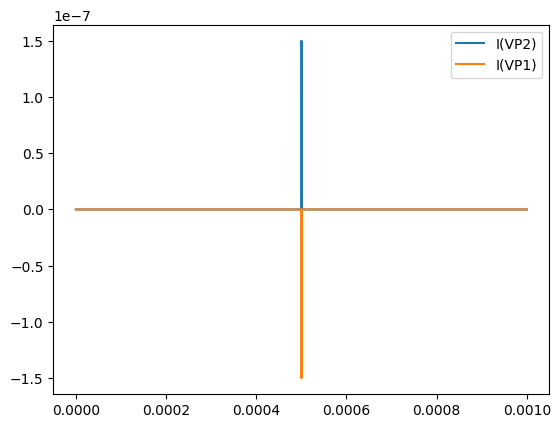

plot: mem_cap_test_v_0_5.cir.prn


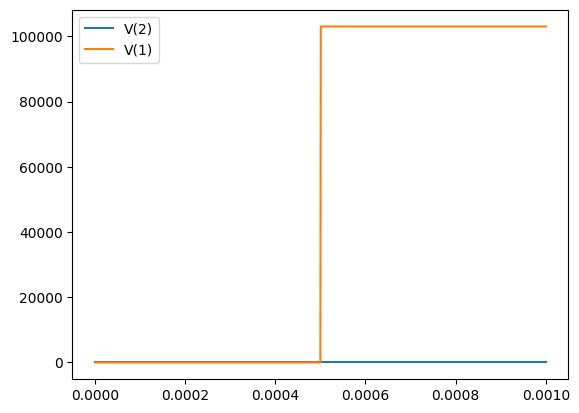

Displ vol:8.873465220617191e-15
vol limit:6.282000000000001e-13


In [31]:
#src_path = cir_root+'/.'+fname.split('.')[0]+'_src'plot_r(mem_t_dir+'/mem_cap_test_v_0_5.cir.prn')
#plot_r(mem_t_dir+'/results/mem_cap_test_v_0_5.cir.prn')
cir = 'mem_cap_test_v_0_5.cir'
prn_f = mem_t_dir+'/results/'+cir+'.prn'
run_and_plot(lib, cir, plot_type="flow")
plot_r(prn_f, plot_type='voltage')

res = plot_result.load_prn(prn_f)
tim  = res['TIME'] 
I_vp = res['I(VP2)']

I_vp_t = sum_cur(tim, I_vp)

print("Displ vol:"+str(I_vp_t))

vol_lim = 3.141*100e-6**2*20e-6
print("vol limit:"+str(vol_lim))


Xyce -plugin ./../../Components/verilogA_build/lib/MFXyce.so /home/u1146591/MFDA/h.r.3.3_pdk/xyce_testing/JupyterTesting/../MFlibrary_testing/stdcellTesting/membrane_cap/mem_cap_test_v_0_5.nlim.cir > /home/u1146591/MFDA/h.r.3.3_pdk/xyce_testing/JupyterTesting/../MFlibrary_testing/stdcellTesting/membrane_cap/mem_cap_test_v_0_5.nlim.cir.log
Xyce -plugin ./../../Components/verilogA_build/lib/MFXyce.so /home/u1146591/MFDA/h.r.3.3_pdk/xyce_testing/JupyterTesting/../MFlibrary_testing/stdcellTesting/membrane_cap/mem_cap_test_v_0_5.nlim.cir > /home/u1146591/MFDA/h.r.3.3_pdk/xyce_testing/JupyterTesting/../MFlibrary_testing/stdcellTesting/membrane_cap/mem_cap_test_v_0_5.nlim.cir.log
plot: mem_cap_test_v_0_5.nlim.cir.prn


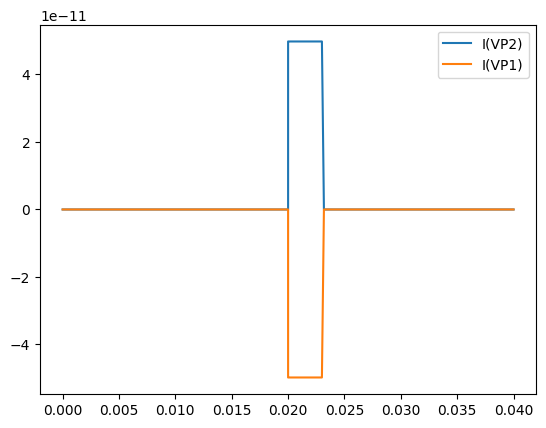

plot: mem_cap_test_v_0_5.nlim.cir.prn


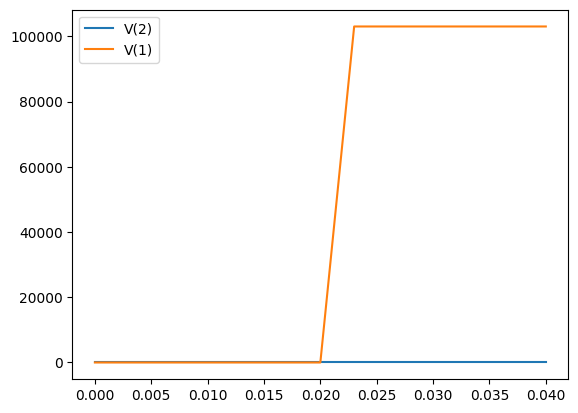

Displ vol:8.873499086407253e-15
vol limit:6.282000000000001e-13


In [20]:
cir = 'mem_cap_test_v_0_5.nlim.cir'
prn_f = mem_t_dir+'/results/'+cir+'.prn'
run_and_plot(lib, cir, plot_type="flow")
plot_r(prn_f, plot_type='voltage')

res = plot_result.load_prn(prn_f)
tim  = res['TIME'] 
I_vp = res['I(VP2)']

I_vp_t = sum_cur(tim, I_vp)

print("Displ vol:"+str(I_vp_t))

vol_lim = 3.141*100e-6**2*20e-6
print("vol limit:"+str(vol_lim))

Xyce -plugin ./../../Components/verilogA_build/lib/MFXyce.so /home/u1146591/MFDA/h.r.3.3_pdk/xyce_testing/JupyterTesting/../MFlibrary_testing/stdcellTesting/membrane_cap/mem_cap_test_v_0_5_1.cir > /home/u1146591/MFDA/h.r.3.3_pdk/xyce_testing/JupyterTesting/../MFlibrary_testing/stdcellTesting/membrane_cap/mem_cap_test_v_0_5_1.cir.log
Xyce -plugin ./../../Components/verilogA_build/lib/MFXyce.so /home/u1146591/MFDA/h.r.3.3_pdk/xyce_testing/JupyterTesting/../MFlibrary_testing/stdcellTesting/membrane_cap/mem_cap_test_v_0_5_1.cir > /home/u1146591/MFDA/h.r.3.3_pdk/xyce_testing/JupyterTesting/../MFlibrary_testing/stdcellTesting/membrane_cap/mem_cap_test_v_0_5_1.cir.log
plot: mem_cap_test_v_0_5_1.cir.prn


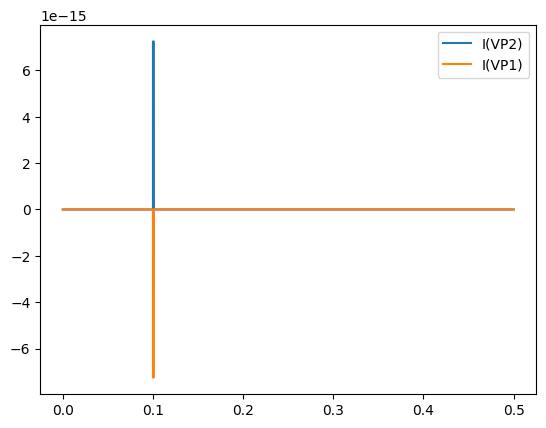

plot: mem_cap_test_v_0_5_1.cir.prn


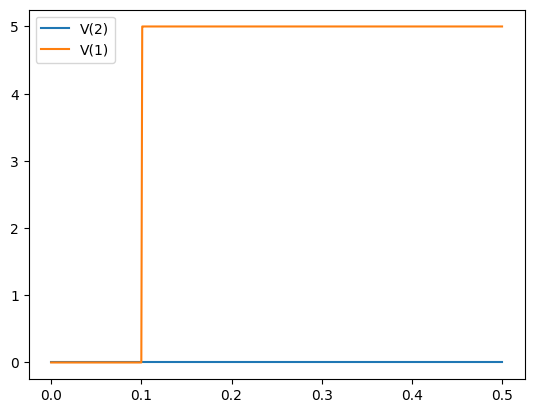

In [19]:
cir = 'mem_cap_test_v_0_5_1.cir'
run_and_plot(lib, cir, plot_type="flow")
plot_r(mem_t_dir+'/results/'+cir+'.prn', plot_type='voltage')

plot: mem_cap_test_v_0_5_1_I.cir.prn


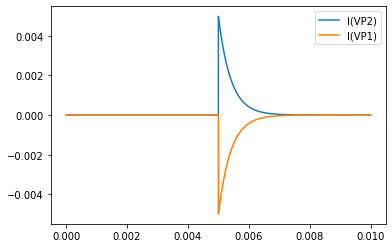

In [9]:
plot_r(mem_t_dir+'/results/mem_cap_test_v_0_5_1_I.cir.prn')
#plot_r(mem_t_dir+'/mem_cap_test_v_0_5_1_I.cir.prn')

plot: mem_cap_test_v_0_5_1_V.cir.prn


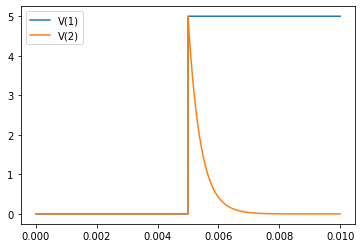

In [10]:
plot_r(mem_t_dir+'/results/mem_cap_test_v_0_5_1_V.cir.prn')

plot: mem_cap_test_v_0_6_1_I.cir.prn


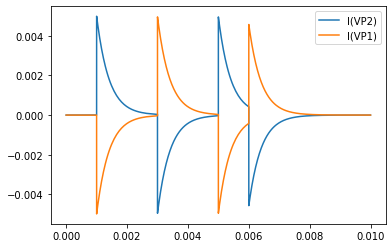

plot: mem_cap_test_v_0_6_1_V.cir.prn


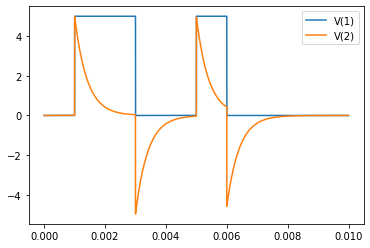

In [11]:
plot_r(mem_t_dir+'/results/mem_cap_test_v_0_6_1_I.cir.prn')
plot_r(mem_t_dir+'/results/mem_cap_test_v_0_6_1_V.cir.prn')

Xyce -plugin ./../../Components/verilogA_build/lib/MFXyce.so /home/u1146591/MFDA/h.r.3.3_pdk/xyce_testing/JupyterTesting/../MFlibrary_testing/stdcellTesting/membrane_cap/mem_cap_test_v_0_6_1.cir > /home/u1146591/MFDA/h.r.3.3_pdk/xyce_testing/JupyterTesting/../MFlibrary_testing/stdcellTesting/membrane_cap/mem_cap_test_v_0_6_1.cir.log
Xyce -plugin ./../../Components/verilogA_build/lib/MFXyce.so /home/u1146591/MFDA/h.r.3.3_pdk/xyce_testing/JupyterTesting/../MFlibrary_testing/stdcellTesting/membrane_cap/mem_cap_test_v_0_6_1.cir > /home/u1146591/MFDA/h.r.3.3_pdk/xyce_testing/JupyterTesting/../MFlibrary_testing/stdcellTesting/membrane_cap/mem_cap_test_v_0_6_1.cir.log
plot: mem_cap_test_v_0_6_1.cir.prn


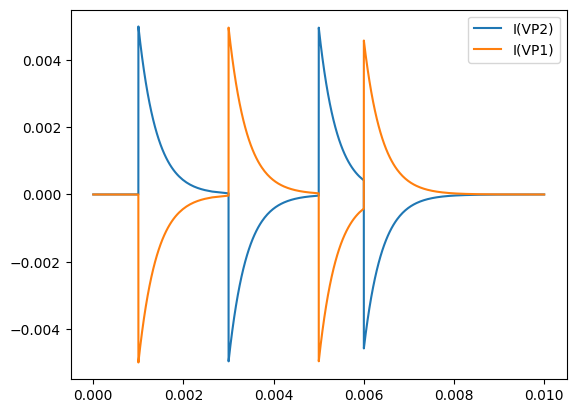

plot: mem_cap_test_v_0_6_1.cir.prn


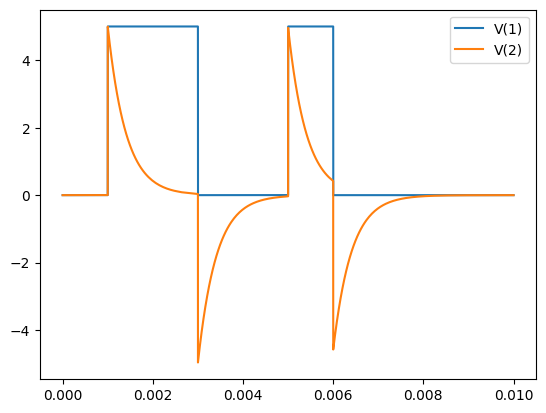

In [10]:
cir = 'mem_cap_test_v_0_6_1.cir'
run_and_plot(lib, cir, plot_type="flow")
plot_r(mem_t_dir+'/results/'+cir+'.prn', plot_type='voltage')

Xyce -plugin ./../../Components/verilogA_build/lib/MFXyce.so /home/u1146591/MFDA/h.r.3.3_pdk/xyce_testing/JupyterTesting/../MFlibrary_testing/stdcellTesting/membrane_cap/mem_cap_test_nlin_1_0.cir > /home/u1146591/MFDA/h.r.3.3_pdk/xyce_testing/JupyterTesting/../MFlibrary_testing/stdcellTesting/membrane_cap/mem_cap_test_nlin_1_0.cir.log
Xyce -plugin ./../../Components/verilogA_build/lib/MFXyce.so /home/u1146591/MFDA/h.r.3.3_pdk/xyce_testing/JupyterTesting/../MFlibrary_testing/stdcellTesting/membrane_cap/mem_cap_test_nlin_1_0.cir > /home/u1146591/MFDA/h.r.3.3_pdk/xyce_testing/JupyterTesting/../MFlibrary_testing/stdcellTesting/membrane_cap/mem_cap_test_nlin_1_0.cir.log
plot: mem_cap_test_nlin_1_0.cir.prn


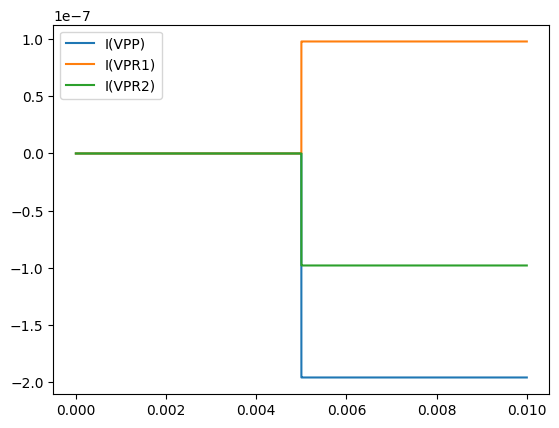

plot: mem_cap_test_nlin_1_0.cir.prn


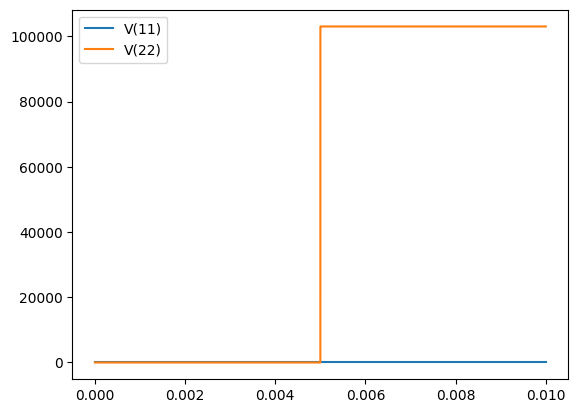

In [16]:
cir = 'mem_cap_test_nlin_1_0.cir'
run_and_plot(lib, cir, plot_type="flow")
plot_r(mem_t_dir+'/results/'+cir+'.prn', plot_type='voltage')